In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)

<Figure size 864x576 with 0 Axes>

In [2]:
df_train = pd.read_csv('D:/Study/Python/data-set/Titanic/train.csv')
df_test = pd.read_csv('D:/Study/Python/data-set/Titanic/test.csv')

In [58]:
[col for col in df_train.columns if df_train[col].dtype.name in ['object', 'category']]

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [22]:
pd.crosstab(df_train['Survived'], [df_train['Sex'], df_train['Pclass'], df_train['Embarked']])

Sex      female                                  male                       \
Pclass        1             2          3            1         2          3   
Embarked      0   C  Q   S  C  Q   S   C   Q   S    C  Q   S  C  Q   S   C   
Survived                                                                     
0             0   1  0   2  0  0   6   8   9  55   25  1  51  8  1  82  33   
1             2  42  1  46  7  2  61  15  24  33   17  0  28  2  0  15  10   

Sex                
Pclass             
Embarked   Q    S  
Survived           
0         36  231  
1          3   34

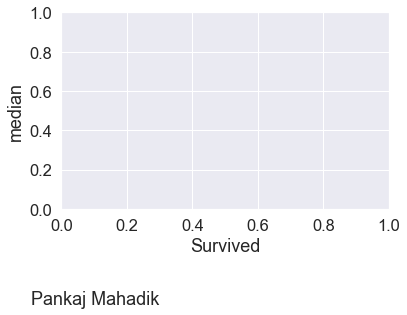

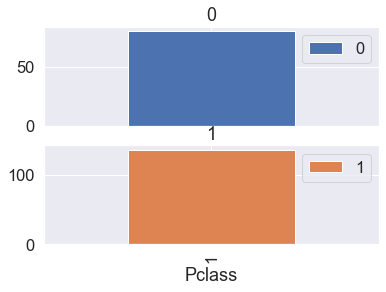

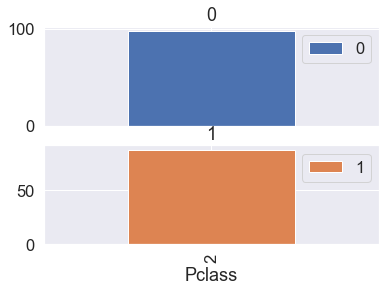

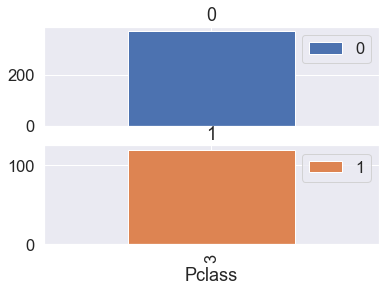

In [105]:
fig, ax = plt.subplots()
ax.set_xlabel('Survived')
ax.set_ylabel('median')
fig.text(0.1, -0.1, 'Pankaj Mahadik')
df_train.groupby(['Pclass','Survived']).size().unstack().groupby('Pclass').plot.bar(subplots=True)
#df_train.groupby(['Pclass','Survived']).agg({'Age':'median', 'Sex':'size', 'Pclass':'size', 'Embarked':'size'}).unstack().T.fillna(df_train['Age'].median()).astype(int).plot.bar(ax = ax)
fig.tight_layout()

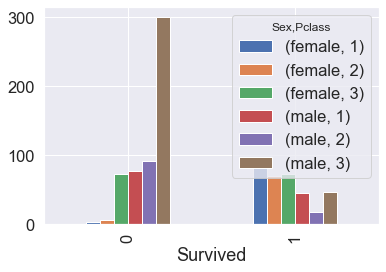

In [114]:
df_train.groupby(['Sex','Pclass', 'Survived']).size().unstack().T.plot.bar()

In [17]:
df_train['Embarked'] = df_train['Embarked'].astype('category')

In [35]:
{x:df_train[x].dtypes.name for x in df_train.columns}

{'PassengerId': 'int64',
 'Survived': 'int64',
 'Pclass': 'int64',
 'Name': 'object',
 'Sex': 'object',
 'Age': 'float64',
 'SibSp': 'int64',
 'Parch': 'int64',
 'Ticket': 'object',
 'Fare': 'float64',
 'Cabin': 'object',
 'Embarked': 'category'}

In [4]:
df = df_train.copy()
df['Age'] = pd.cut(df_train['Age'], 10)
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                               Heikkinen, Miss. Laina  female   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                             Allen, Mr. William Henry    male   
..                                                 ...     ...   
886                              Montvila, Rev. Juozas    male   
887                       Graham, Miss. Margaret Edith  female   
888           Johnston, Miss. Catherine Helen "Carrie"  female   
889                              Behr, Mr. Karl Howell    male   
890                                Dooley, Mr. Patrick    male   

                  Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    (16.336, 24.294]      1      0         A/5 21171   7.2500   NaN        S  
1     (32.252, 40.21]      1      0          PC 17599  71.2833   C85        C  
2    (24.294, 32.252]      0      0  STON/O2. 3101282   7.9250   NaN        S  
3     (32.252, 40.21]      1      0            113803  53.1000  C123        S  
4     (32.252, 40.21]      0      0            373450   8.0500   NaN        S  
..                ...    ...    ...               ...      ...   ...      ...  
886  (24.294, 32.252]      0      0            211536  13.0000   NaN        S  
887  (16.336, 24.294]      0      0            112053  30.0000   B42        S  
888               NaN      1      2        W./C. 6607  23.4500   NaN        S  
889  (24.294, 32.252]      0      0            111369  30.0000  C148        C  
890  (24.294, 32.252]      0      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

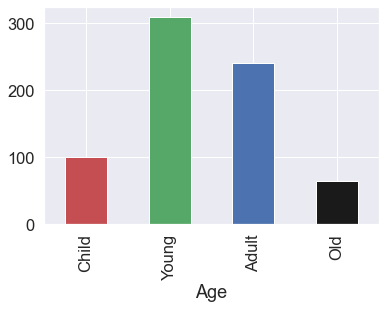

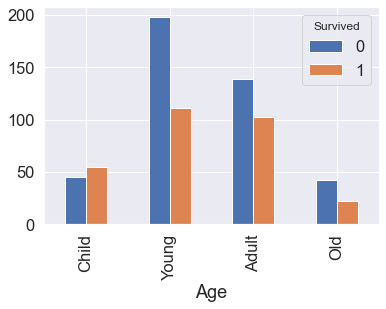

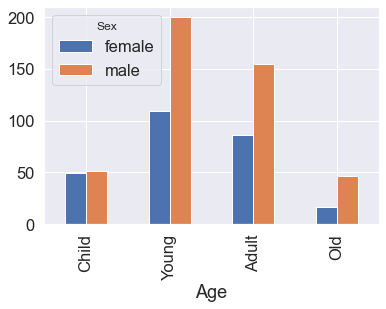

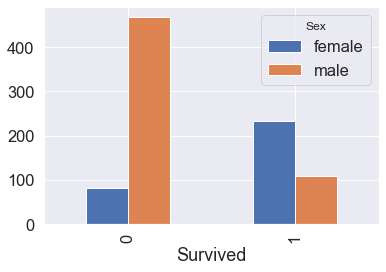

In [5]:
df = df_train.copy()
df['Age'] = pd.cut(df_train['Age'], bins=[0, 16, 30, 50, 100], labels=['Child', 'Young', 'Adult', 'Old'])
df.groupby('Age').size().plot.bar(color=list('rgbkyc'))
df.groupby(['Age', 'Survived']).size().unstack().plot.bar()
df.groupby(['Age', 'Sex']).size().unstack().plot.bar()
df.groupby(['Survived', 'Sex']).size().unstack().plot.bar(legend=True)

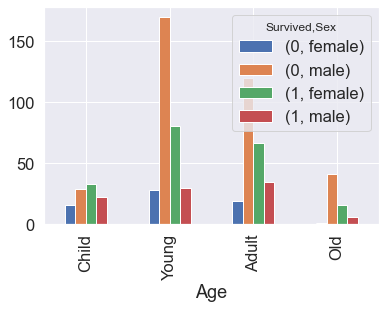

In [6]:
ax = df.groupby(['Survived', 'Sex', 'Age']).size().unstack().T.plot.bar()

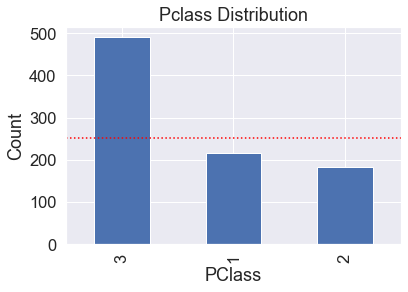

In [7]:
fig, ax = plt.subplots()
df_train['Pclass'].value_counts().plot(ax=ax, kind='bar', title='Pclass Distribution')
ax.set_xlabel('PClass')
ax.set_ylabel('Count')
ax.axhline(y=252, linestyle='dotted', color='red')
plt.show()

In [48]:
df=df_train.groupby(['Survived', 'Sex'])['Age', 'Fare'].agg({'Age':'mean', 'Fare':'mean'})
df

<ipython-input-48-3dea2ed114ff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df=df_train.groupby(['Survived', 'Sex'])['Age', 'Fare'].agg({'Age':'mean', 'Fare':'mean'})


Age       Fare
Survived Sex                         
0        female  25.046875  23.024385
         male    31.618056  21.960993
1        female  28.847716  51.938573
         male    27.276022  40.821484

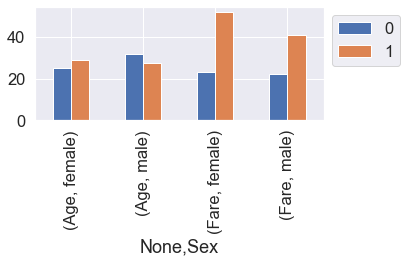

In [72]:
fig, ax = plt.subplots()
df.unstack().T.plot.bar(ax = ax, legend=False);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
fig.tight_layout()


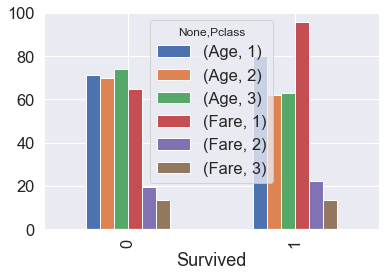

In [37]:

df_train.pivot_table(index=['Survived', 'Pclass'], values=['Age', 'Fare'], aggfunc={'Age':'max', 'Fare':'mean'}).unstack().plot.bar()

AttributeError: 'numpy.ndarray' object has no attribute 'legend'

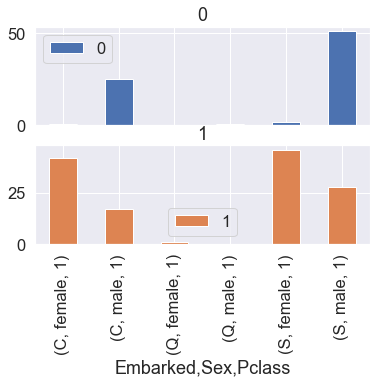

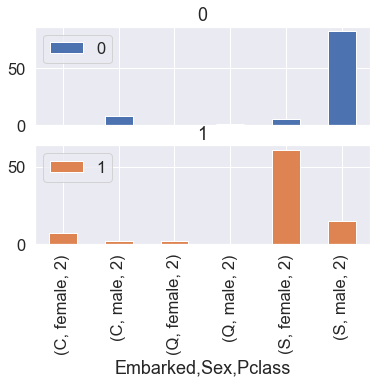

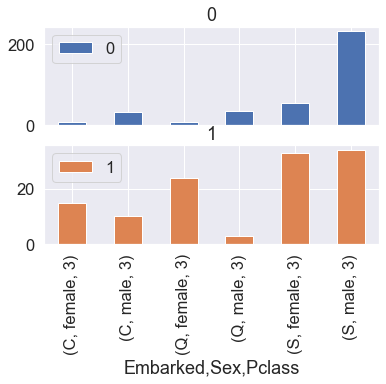

In [179]:
axs = df_train.groupby(['Embarked', 'Sex', 'Pclass', 'Survived']).size().unstack().groupby(['Pclass']).plot.bar(subplots=True, legend='upper right')
for x in axs:
    x.legend(loc='upper left', bbox_to_anchor=(1, 1))


In [119]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

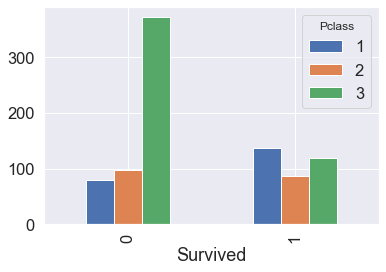

In [9]:
df.unstack().plot.bar()

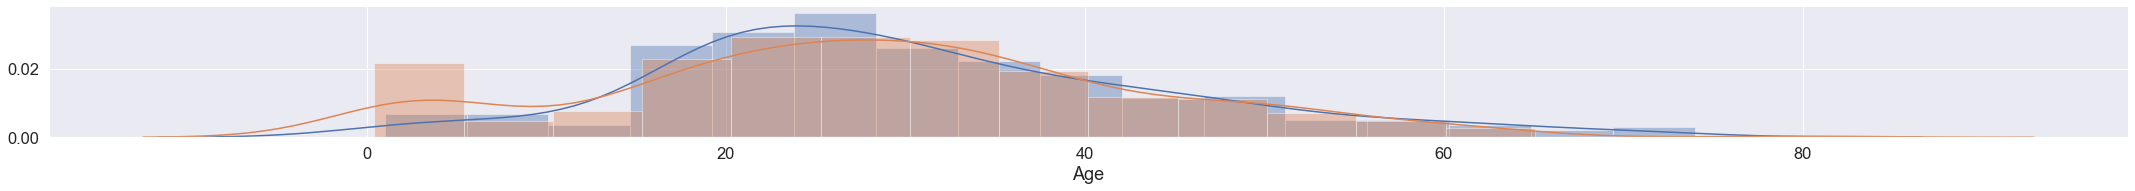

In [127]:
grid = sns.FacetGrid(df_train, hue='Survived', aspect=10)
grid.map(sns.distplot, 'Age')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF9AAA0490>],
      dtype=object)

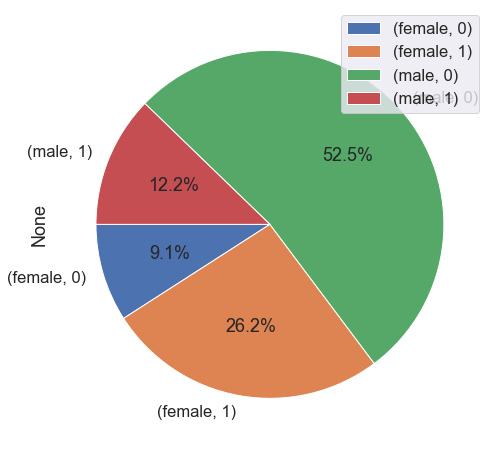

In [3]:
.df_t.rain.groupby(['Sex', 'Survived']).size().plot(figsize=(12,8),kind='pie', legend=True, autopct='%1.1f%%',startangle=180, subplots=True, )

In [4]:
df_train.groupby(['Sex', 'Survived']).size().unstack()

Survived    0    1
Sex               
female     81  233
male      468  109

In [5]:
df_train.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [6]:
for col in ['Sex', 'Pclass', 'Parch', 'SibSp', 'Embarked']:
    print(df_train.groupby([col, 'Survived']).size())
    print()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
dtype: int64

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
dtype: int64

Embarked  Survived
C         0            75
          1            93
Q         0    

In [7]:
for col in ['Sex', 'Pclass', 'Parch', 'SibSp', 'Embarked']:
    print(df_train.groupby([col])['Survived'].value_counts())
    print()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

Embarked  Survived
C  

In [8]:
df_train.drop(['PassengerId'], inplace=True, axis=1)

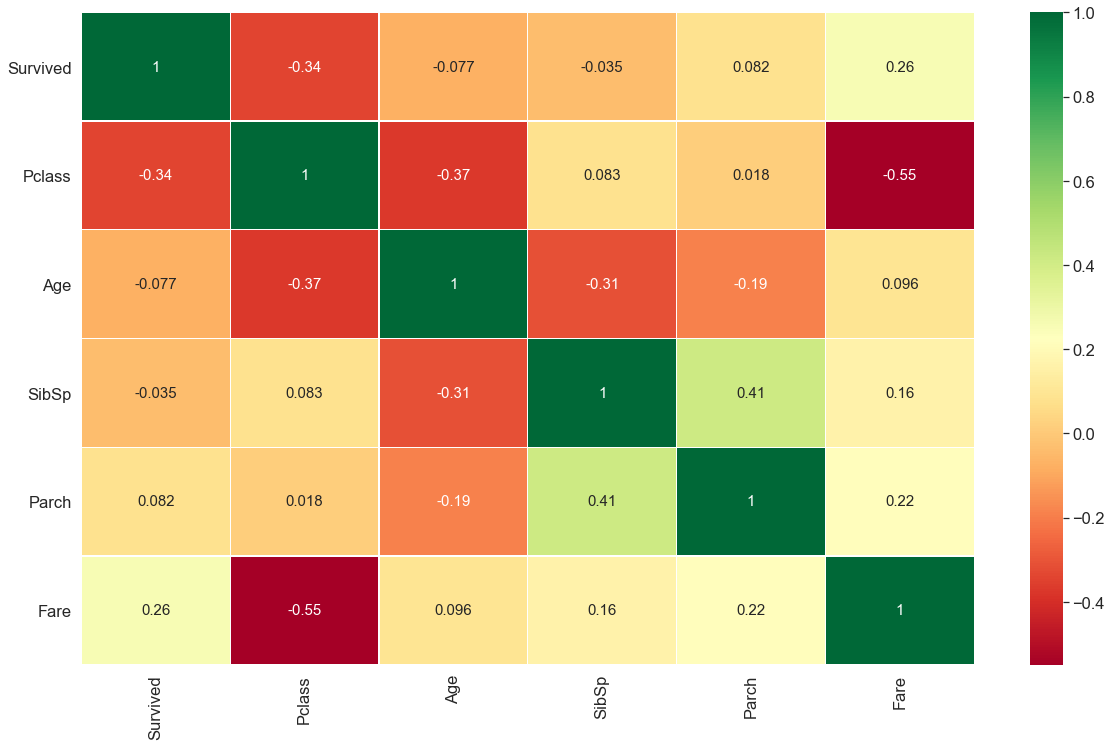

In [9]:
sns.heatmap(df_train.corr(), annot=True,cmap='RdYlGn',linewidths=0.2, annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [10]:
df_train['Sex'] = df_train['Sex'].map({'female':1, 'male':0}).astype(int)
df_test['Sex'] = df_test['Sex'].map({'female':1, 'male':0}).astype(int)

In [11]:
dev = round(df_train['Age'].std())
median = round(df_train['Age'].median())
dev, median

(15, 28)

In [12]:
pd.DataFrame(abs(np.random.randint(dev-median, dev+median, df_train['Age'].isna().sum())))

0
0    11
1    19
2     5
3    15
4    36
..   ..
172   7
173   1
174   5
175  40
176  41

[177 rows x 1 columns]

In [13]:
age_median = df_train["Age"].median()
age_std = df_train["Age"].std()
age_null_count = df_train["Age"].isna().sum()
rand_age = np.random.randint(age_median - age_std, age_median + age_std, size = age_null_count)
age_slice = df_train["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df_train["Age"] = age_slice
df_train["Age"] = df_train["Age"].astype(int)

age_median = df_test["Age"].median()
age_std = df_test["Age"].std()
age_null_count = df_test["Age"].isna().sum()
rand_age = np.random.randint(age_median - age_std, age_median + age_std, size = age_null_count)
age_slice = df_test["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df_test["Age"] = age_slice
df_test["Age"] = df_test["Age"].astype(int)


In [14]:
df_train['Age'].isna().sum()

0

In [15]:
#df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
#df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

#df_train['Age'] = df_train['Age'].astype(int)
#df_test['Age'] = df_test['Age'].astype(int)

In [16]:
df_train['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

df_train['Embarked'] = df_train['Embarked'].map({'S':1, 'C':2, 'Q':3}).astype(int)
df_test['Embarked'] = df_test['Embarked'].map({'S':1, 'C':2, 'Q':3}).astype(int)

In [17]:
df_train['Fare'].fillna(df_train['Fare'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

In [18]:
df_train['Family'] = 1 + df_train['SibSp'] + df_train['Parch']
df_test['Family'] = 1 + df_test['SibSp'] + df_test['Parch']

In [19]:
#X = df_train[['Sex', 'Age', 'Pclass', 'Embarked', 'SibSp', 'Parch', 'Family', 'Fare']]
X = df_train[['Sex', 'Age', 'Pclass', 'Embarked', 'SibSp', 'Fare']]
y = df_train['Survived']
pd.concat([X, y], axis=1)

Sex  Age  Pclass  Embarked  SibSp     Fare  Survived
0      0   22       3         1      1   7.2500         0
1      1   38       1         2      1  71.2833         1
2      1   26       3         1      0   7.9250         1
3      1   35       1         1      1  53.1000         1
4      0   35       3         1      0   8.0500         0
..   ...  ...     ...       ...    ...      ...       ...
886    0   27       2         1      0  13.0000         0
887    1   19       1         1      0  30.0000         1
888    1   15       3         1      1  23.4500         0
889    0   26       1         2      0  30.0000         1
890    0   32       3         3      0   7.7500         0

[891 rows x 7 columns]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

<IPython.core.display.Javascript object>

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def predict_calculate_print_accuracy(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(type(clf))
    print(f"Model Accuracy: {round(clf.score(X_train, y_train) * 100.0, 2)}")
    print(f"Prediction Accuracy: {round(accuracy * 100.0, 2)}")
    print()
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(cf_matrix)
    print()
    print(classification_report(y_test, y_pred))
    sns.heatmap(cf_matrix,annot=True,fmt='3.0f',cmap="RdYlGn")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Model Accuracy: 90.69
Prediction Accuracy: 82.84

[[140  19]
 [ 27  82]]

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       159
           1       0.81      0.75      0.78       109

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



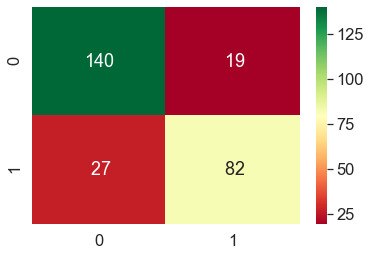

In [167]:
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

clf = RandomForestClassifier(criterion= 'gini',
 min_samples_leaf= 1,
 min_samples_split= 10,
 n_estimators= 400)

predict_calculate_print_accuracy(clf, X_train, X_test, y_train, y_test)



In [24]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

importance
feature             
Sex            0.360
Fare           0.215
Pclass         0.171
Age            0.165
Embarked       0.047
SibSp          0.040

In [160]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier()
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)


<IPython.core.display.Javascript object>

AttributeError: 'GridSearchCV' object has no attribute 'bestparams'

In [161]:
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 400}

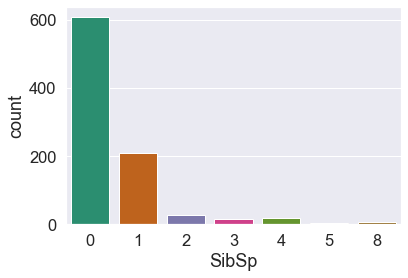

In [191]:
sns.countplot(df_train['SibSp'], palette='Dark2')

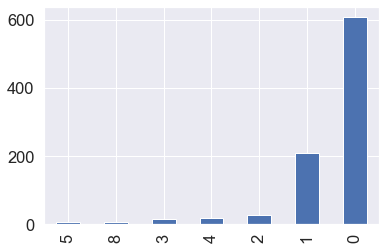

In [205]:
df_train['SibSp'].value_counts(ascending=True).plot(kind='bar')

In [154]:
for c in dir(plt.cm):
    print(c)

Accent
Accent_r
Blues
Blues_r
BrBG
BrBG_r
BuGn
BuGn_r
BuPu
BuPu_r
CMRmap
CMRmap_r
Dark2
Dark2_r
GnBu
GnBu_r
Greens
Greens_r
Greys
Greys_r
LUTSIZE
OrRd
OrRd_r
Oranges
Oranges_r
PRGn
PRGn_r
Paired
Paired_r
Pastel1
Pastel1_r
Pastel2
Pastel2_r
PiYG
PiYG_r
PuBu
PuBuGn
PuBuGn_r
PuBu_r
PuOr
PuOr_r
PuRd
PuRd_r
Purples
Purples_r
RdBu
RdBu_r
RdGy
RdGy_r
RdPu
RdPu_r
RdYlBu
RdYlBu_r
RdYlGn
RdYlGn_r
Reds
Reds_r
ScalarMappable
Set1
Set1_r
Set2
Set2_r
Set3
Set3_r
Spectral
Spectral_r
Wistia
Wistia_r
YlGn
YlGnBu
YlGnBu_r
YlGn_r
YlOrBr
YlOrBr_r
YlOrRd
YlOrRd_r
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__spec__
_gen_cmap_d
_reverser
afmhot
afmhot_r
autumn
autumn_r
binary
binary_r
bone
bone_r
brg
brg_r
bwr
bwr_r
cbook
cividis
cividis_r
cmap_d
cmaps_listed
colors
cool
cool_r
coolwarm
coolwarm_r
copper
copper_r
cubehelix
cubehelix_r
datad
flag
flag_r
functools
get_cmap
gist_earth
gist_earth_r
gist_gray
gist_gray_r
gist_heat
gist_heat_r
gist_ncar
gist_ncar_r
gist_rainbow
gist_r

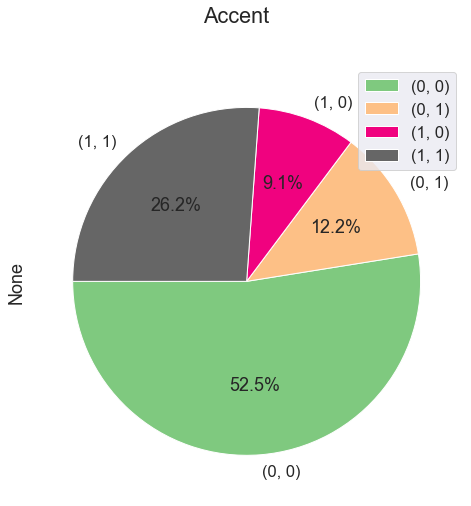

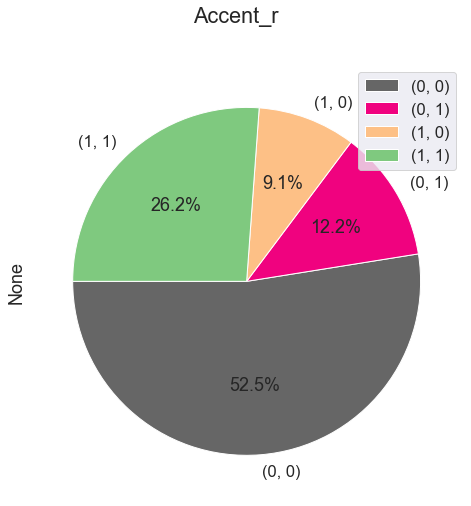

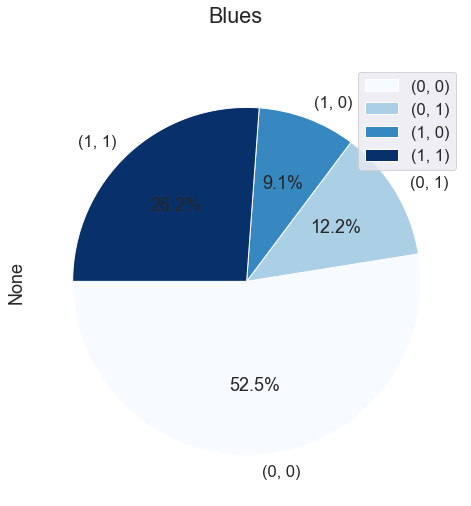

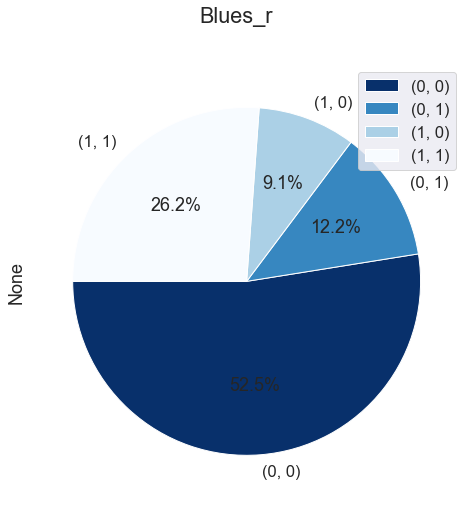

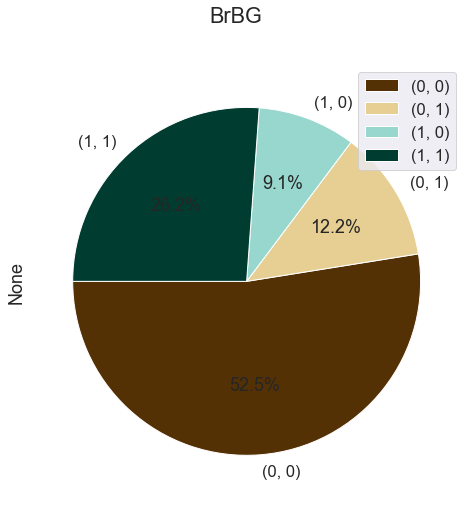

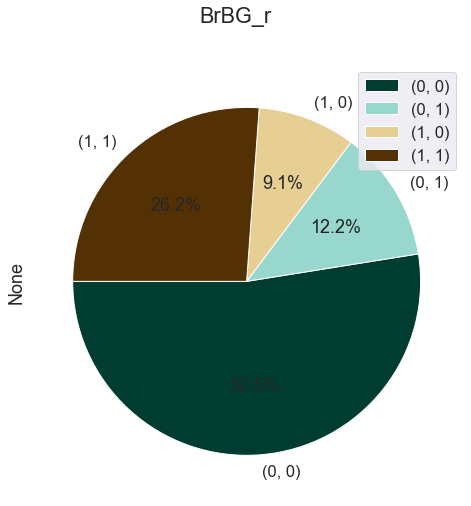

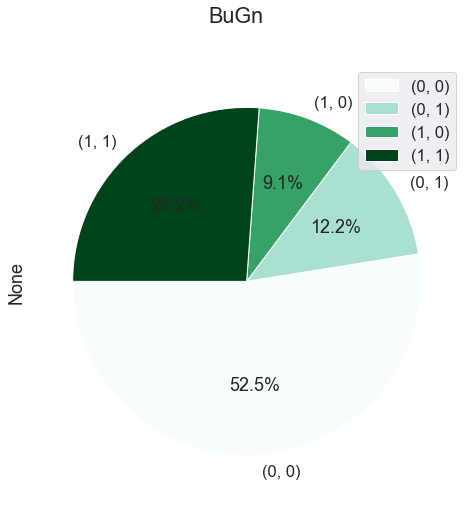

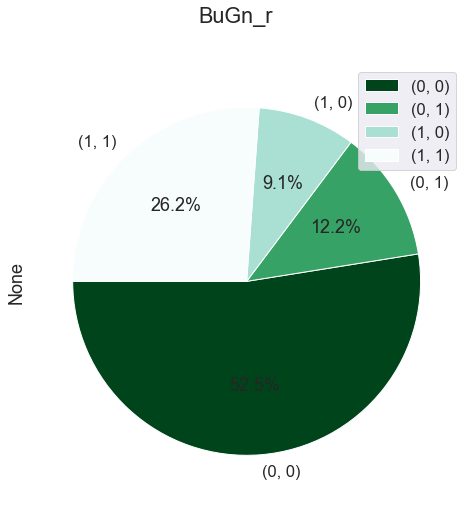

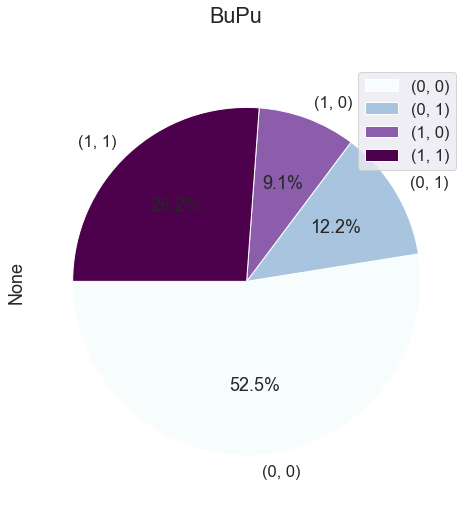

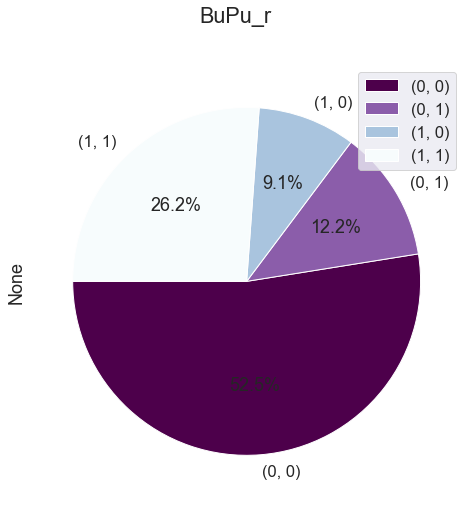

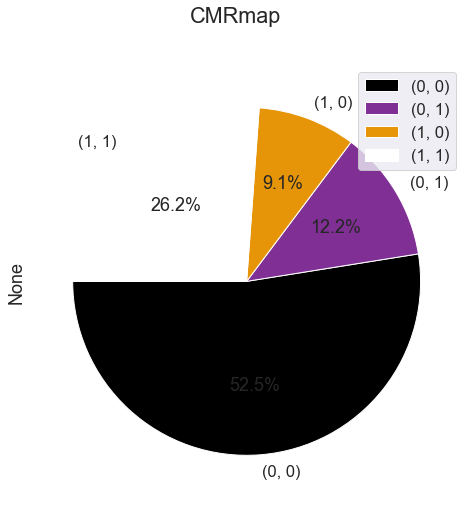

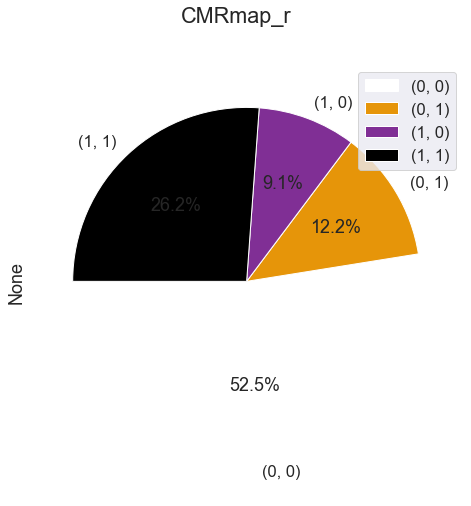

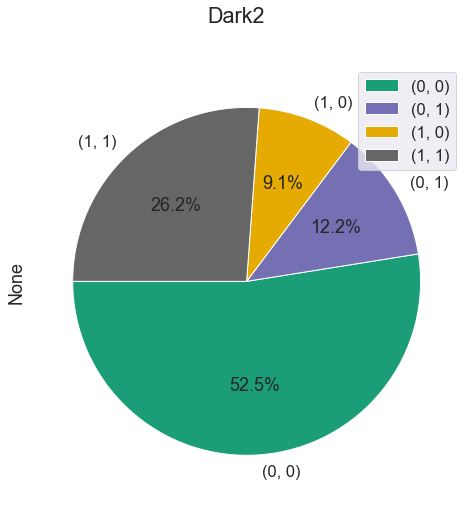

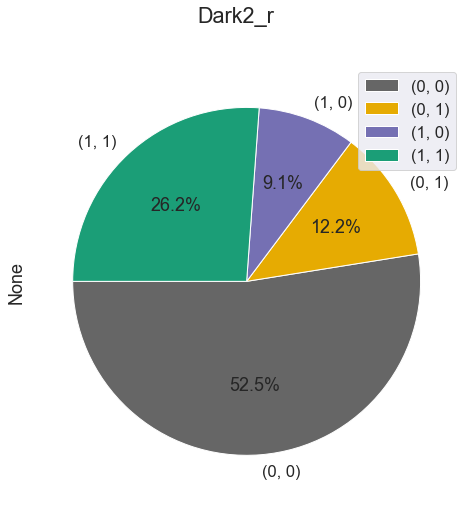

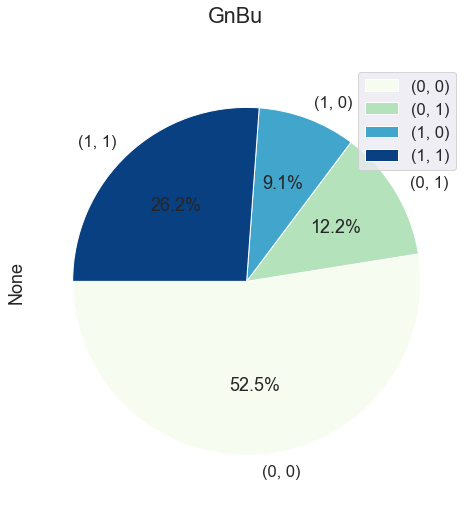

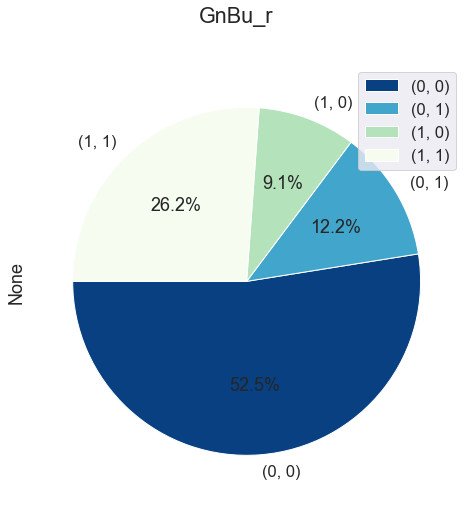

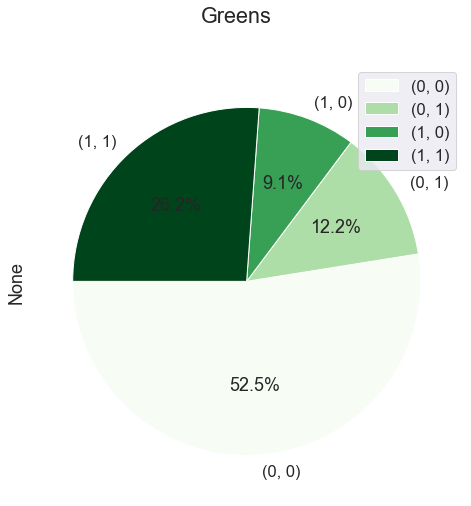

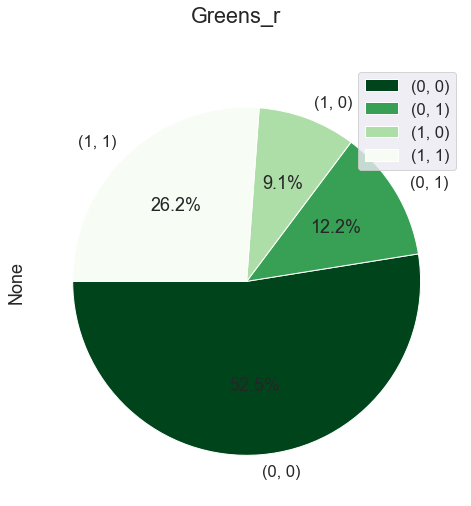

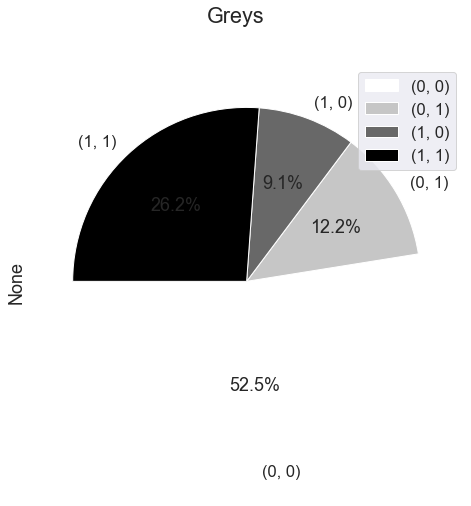

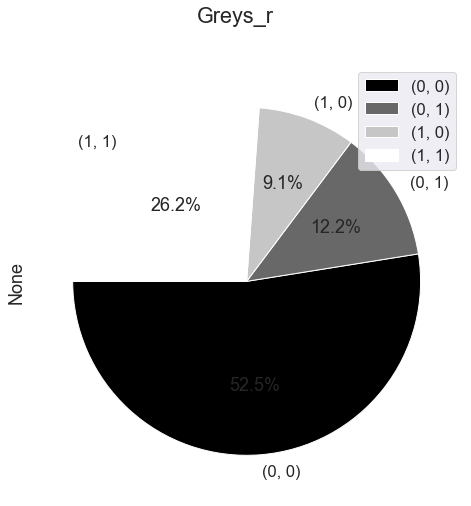

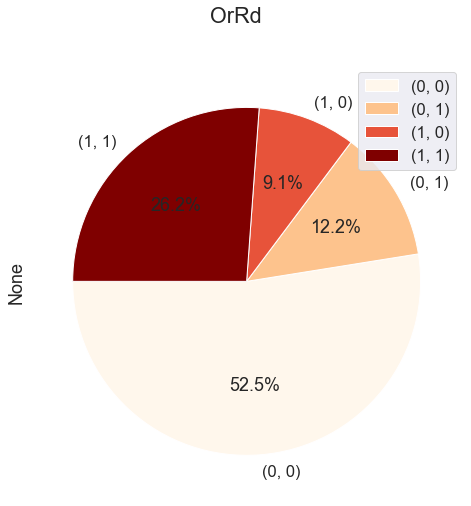

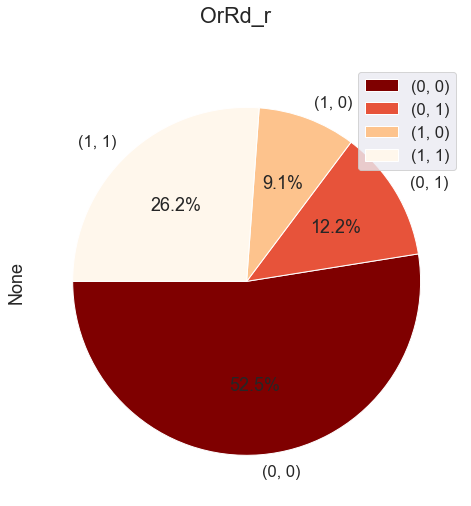

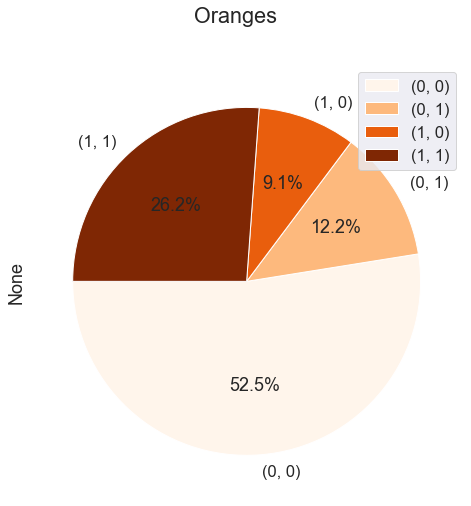

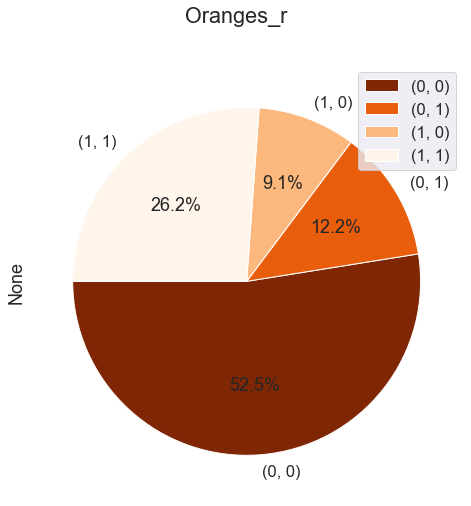

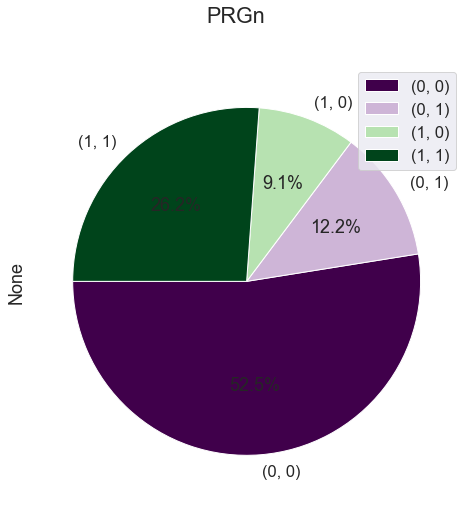

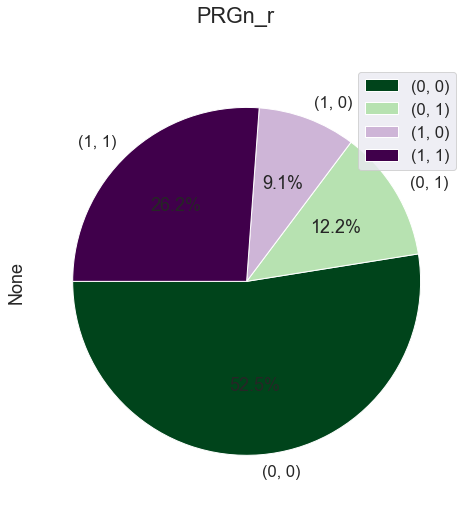

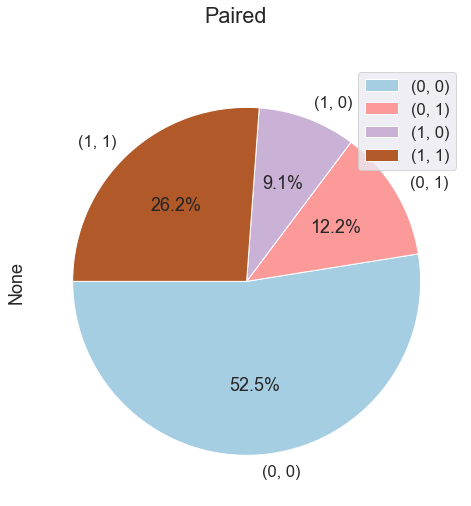

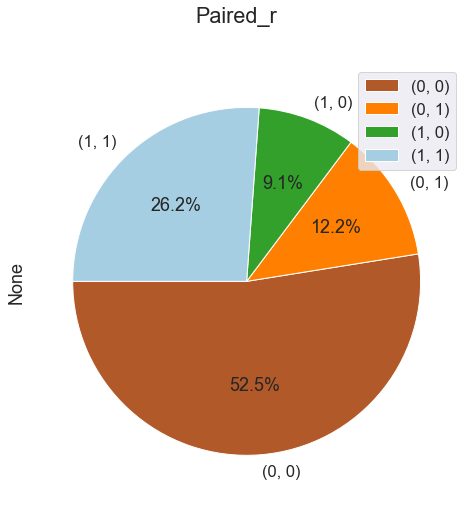

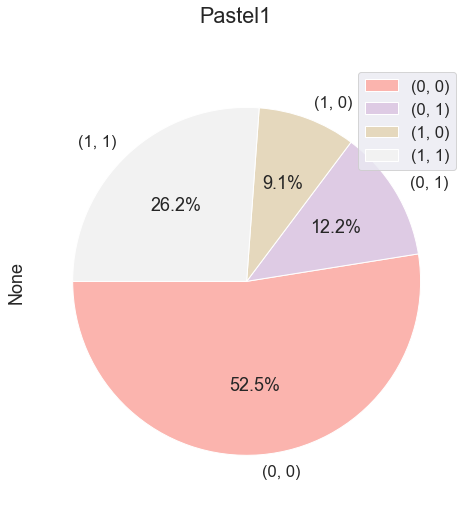

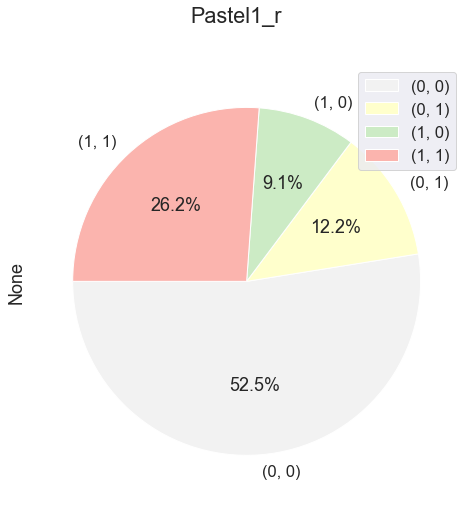

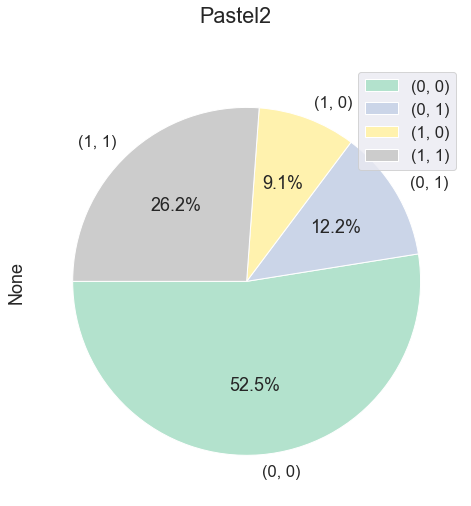

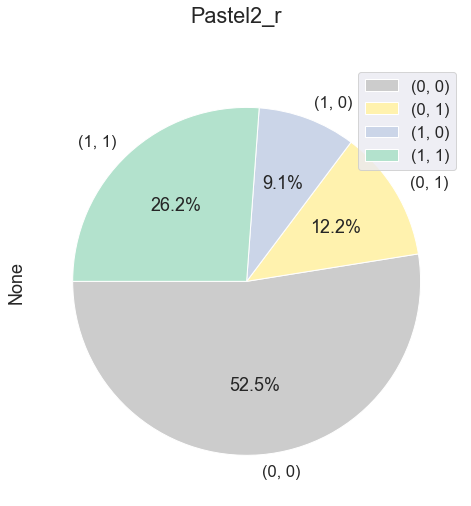

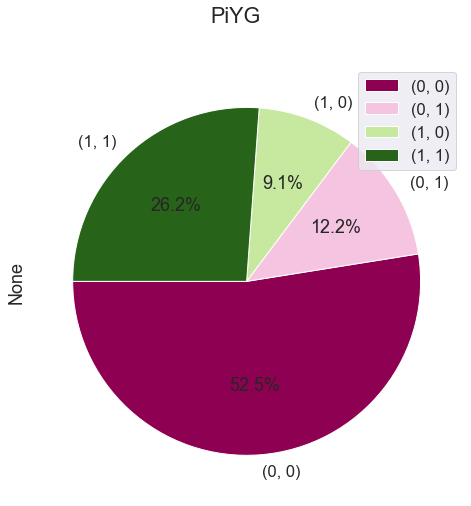

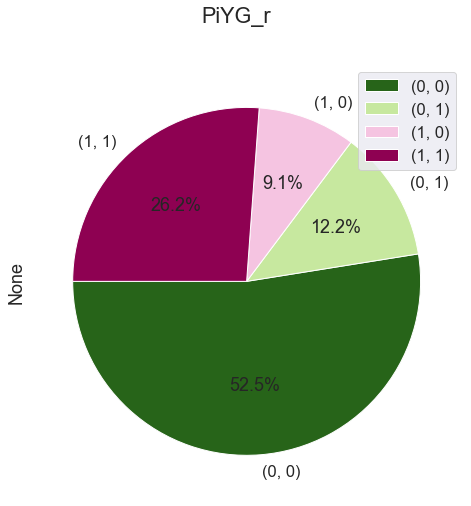

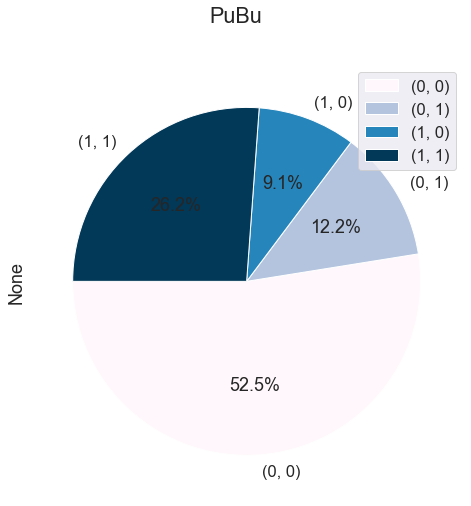

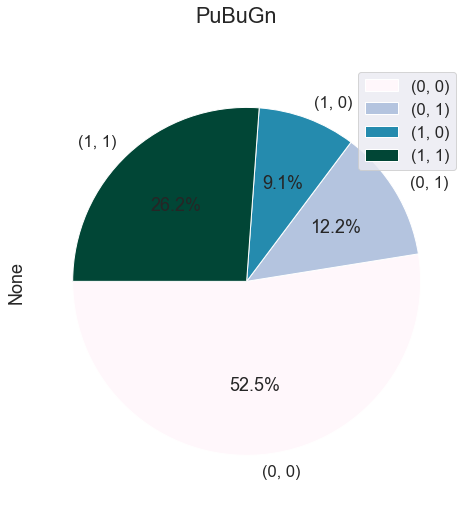

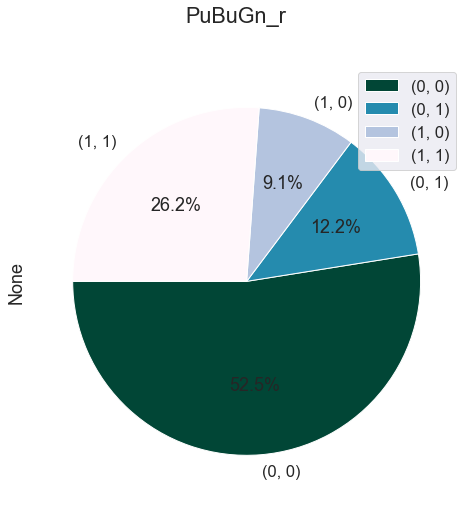

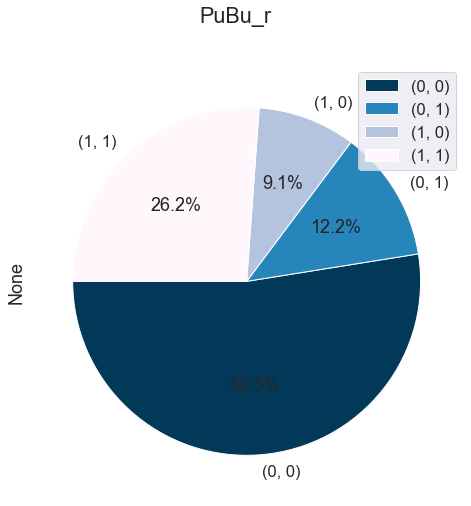

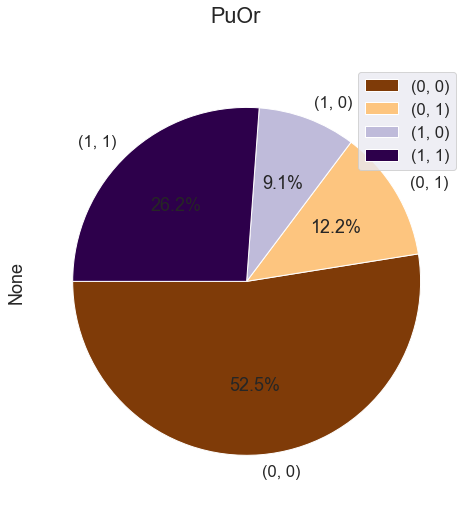

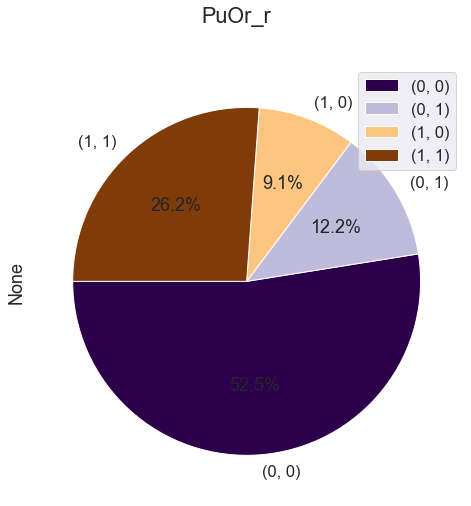

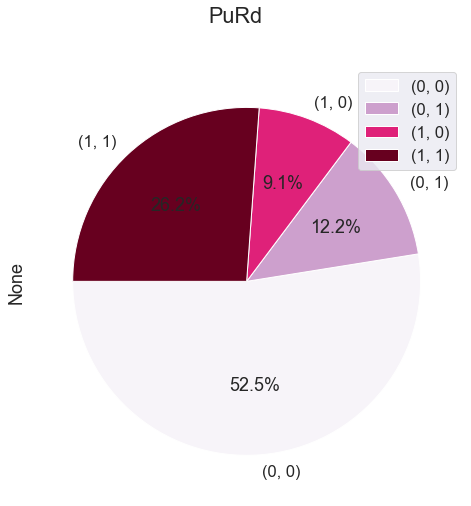

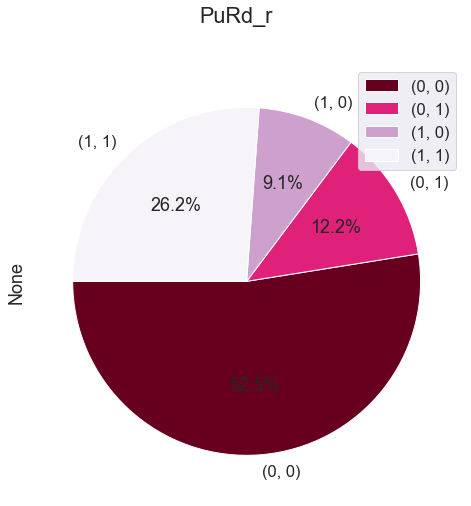

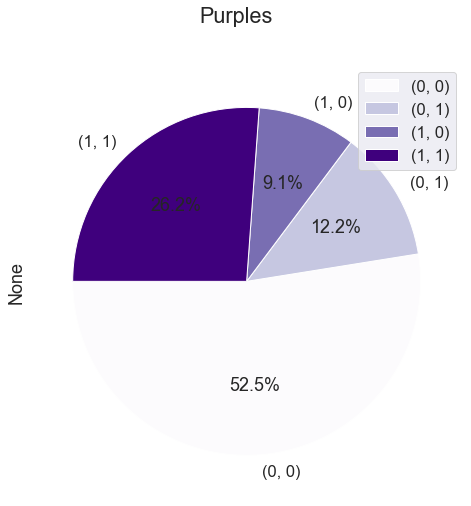

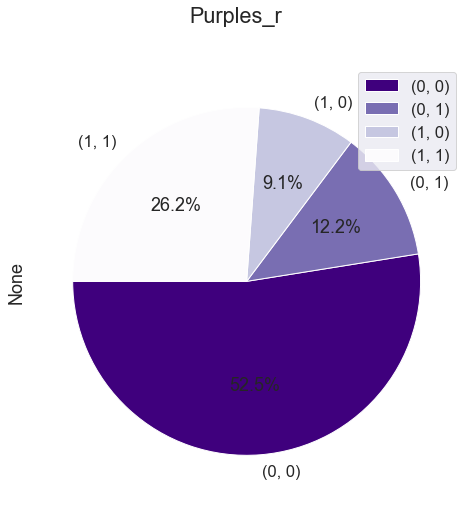

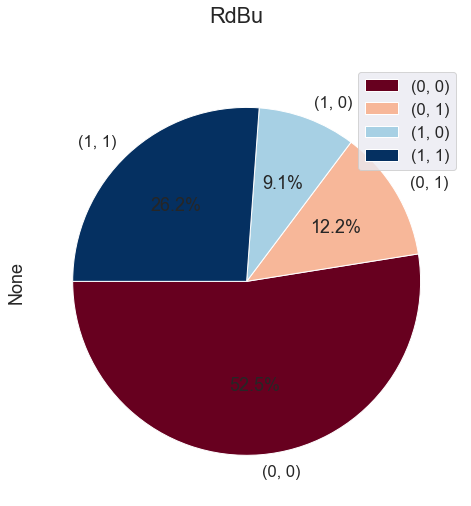

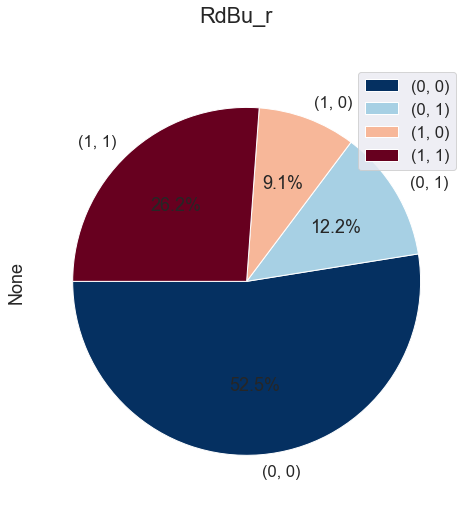

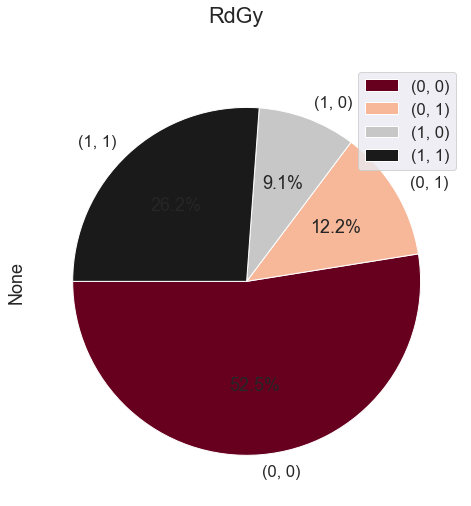

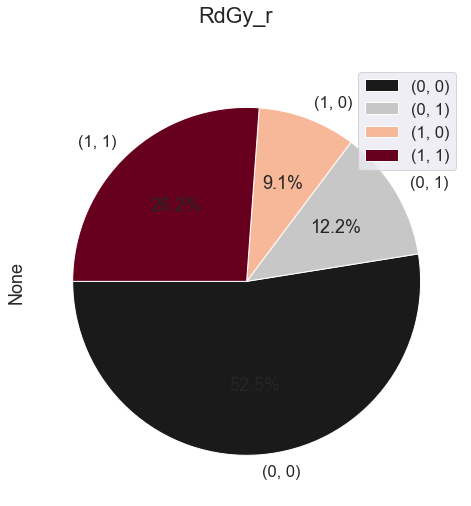

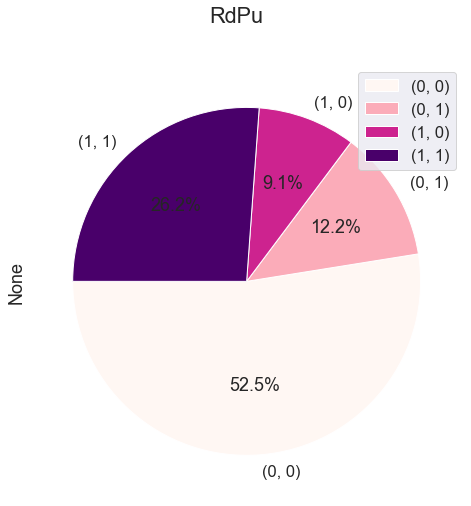

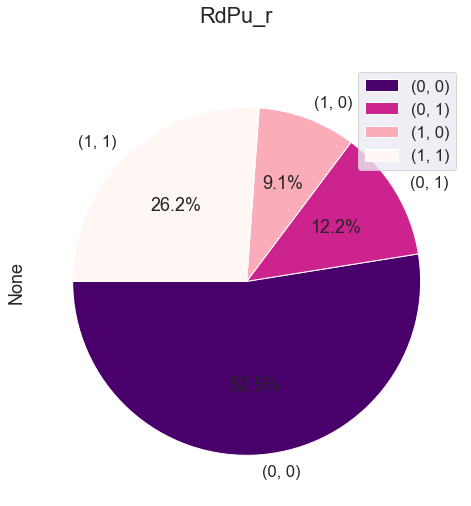

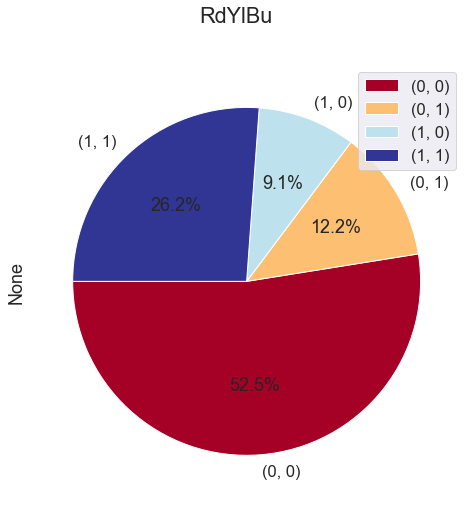

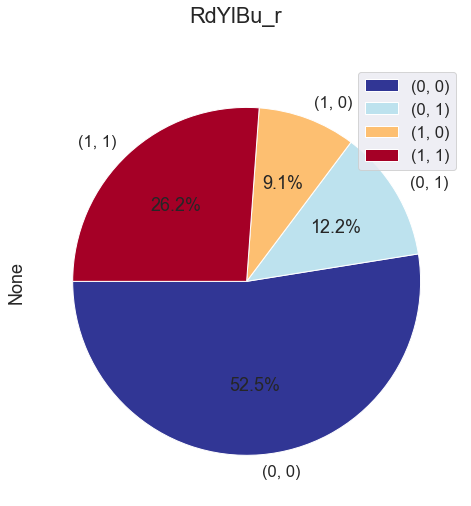

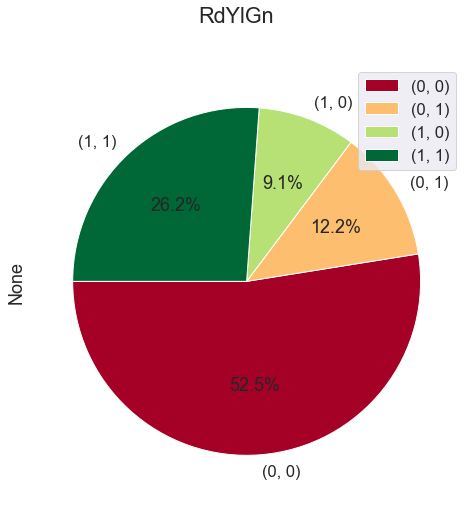

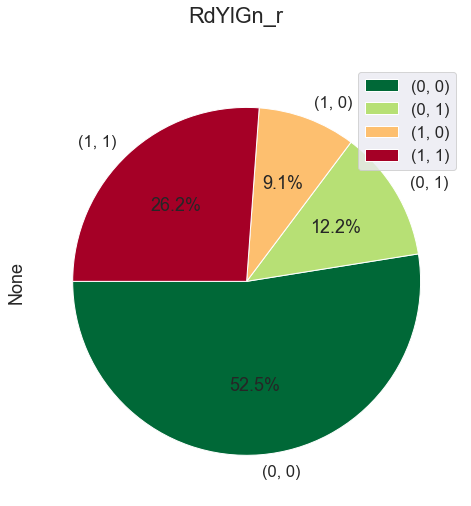

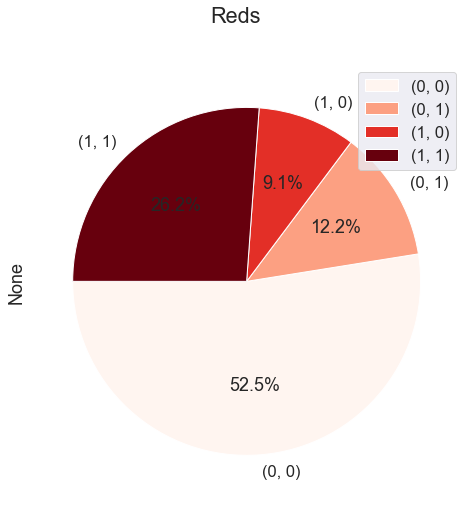

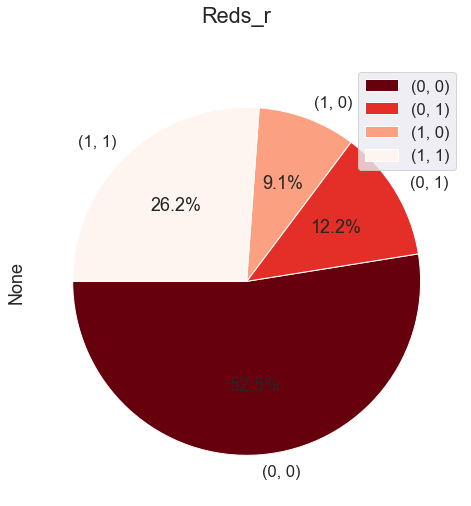

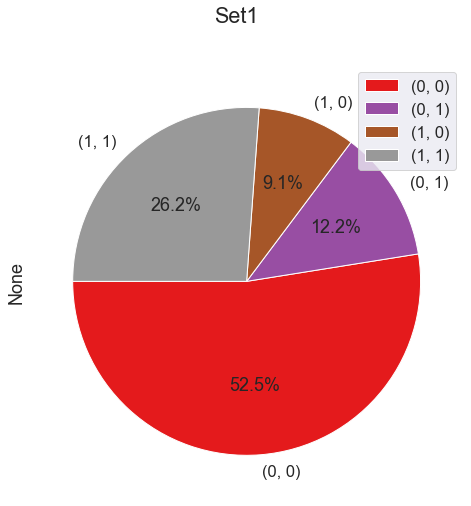

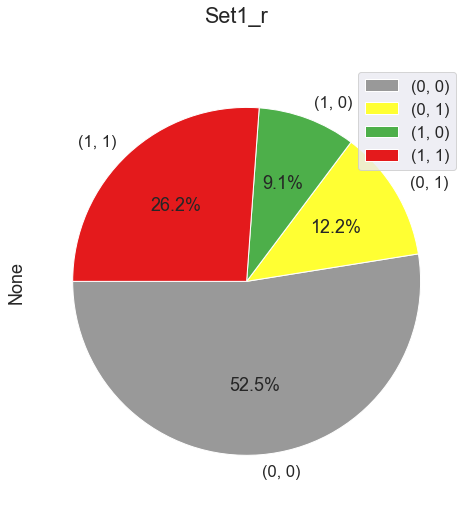

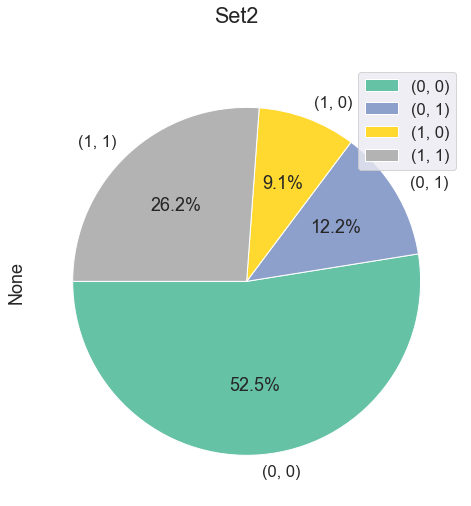

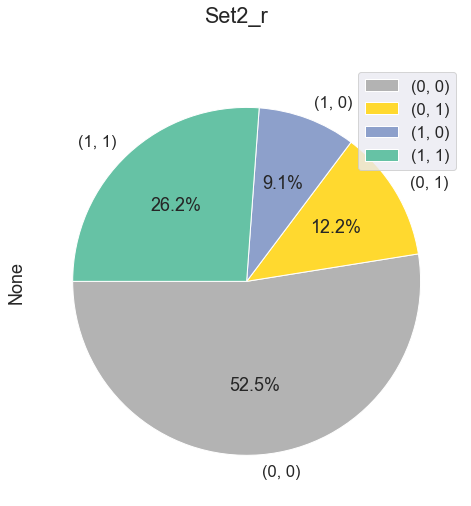

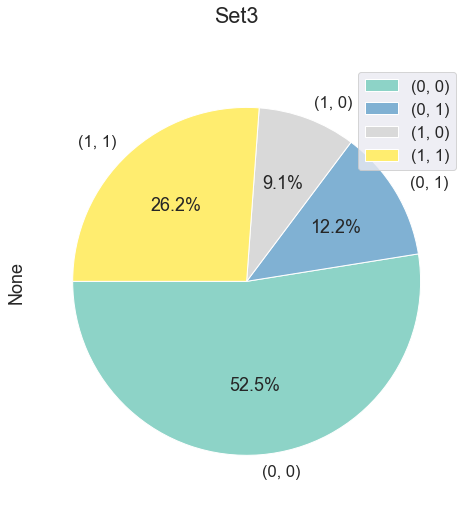

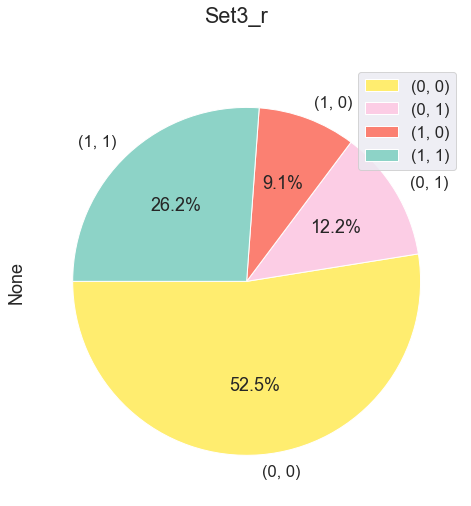

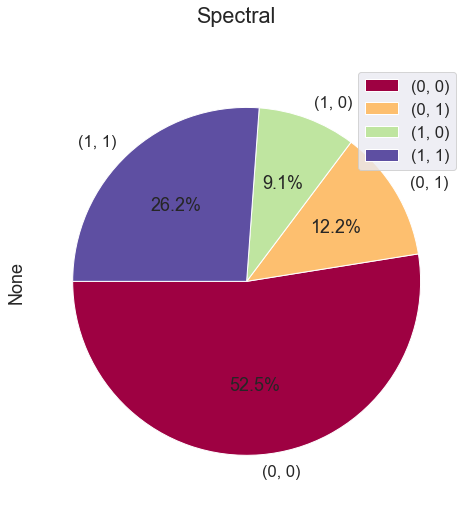

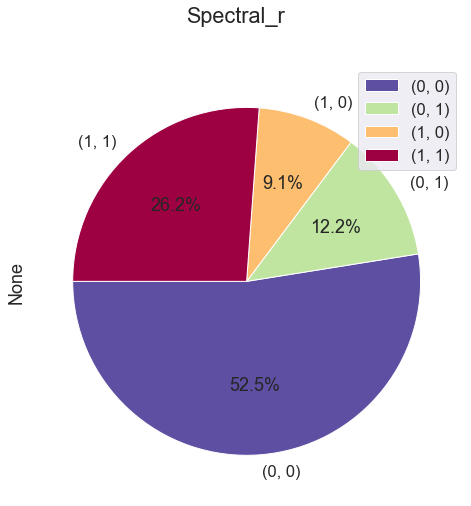

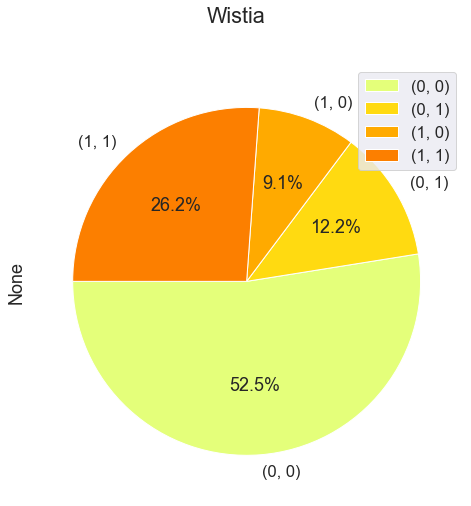

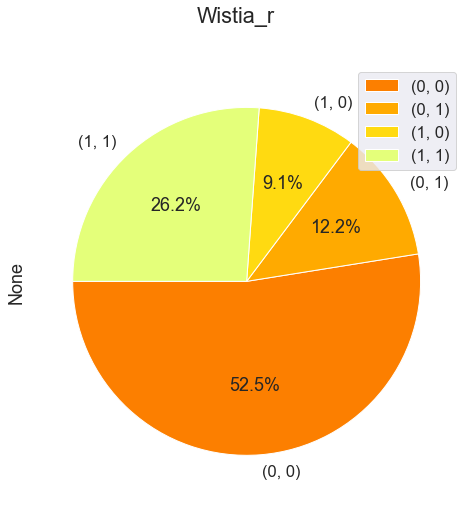

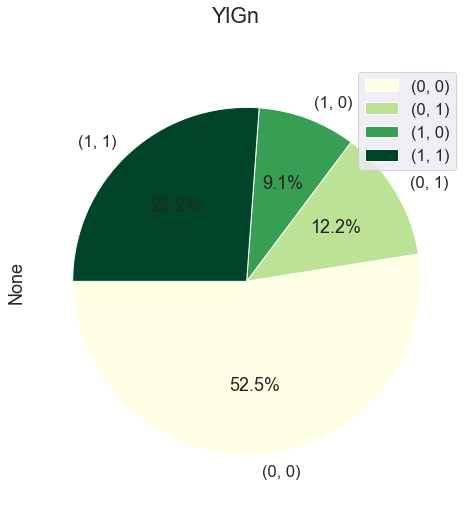

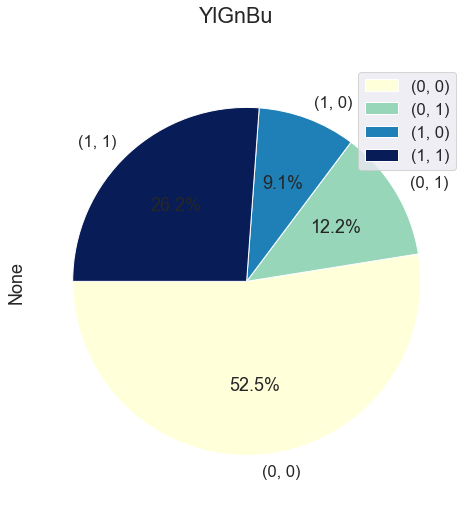

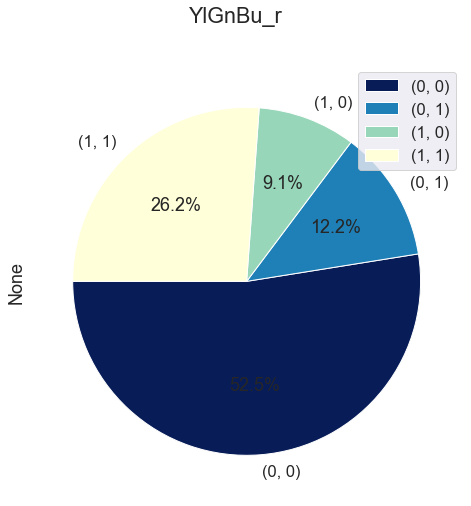

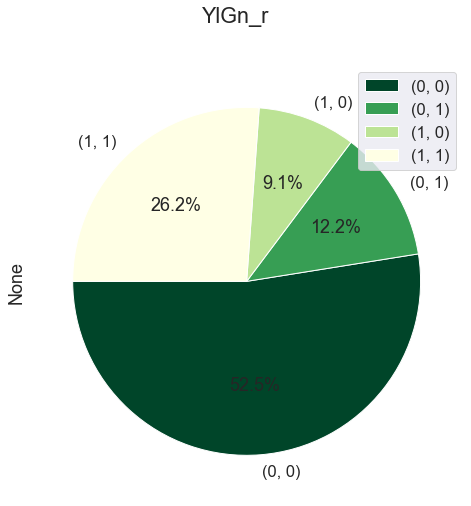

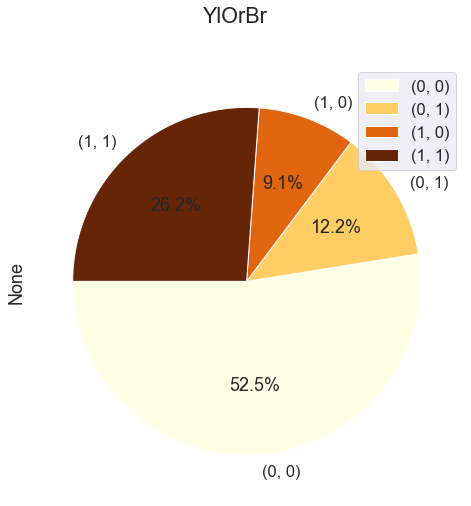

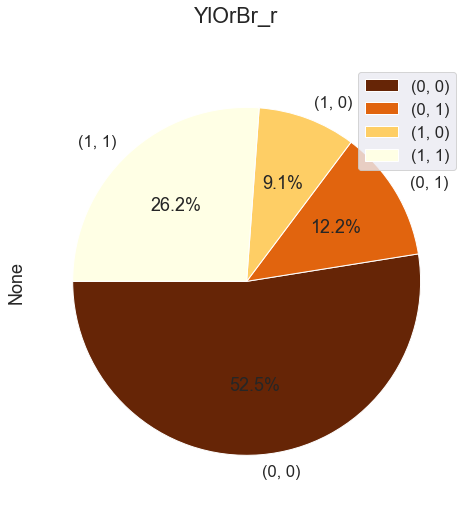

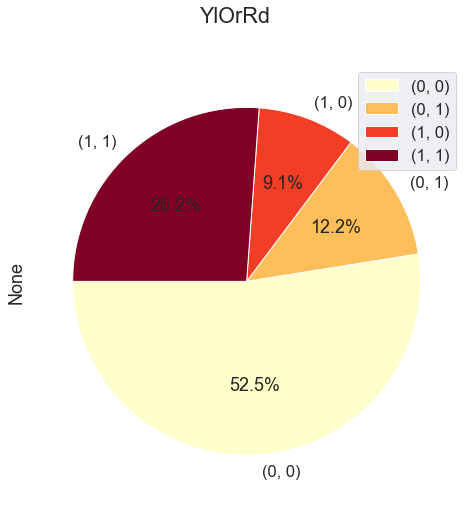

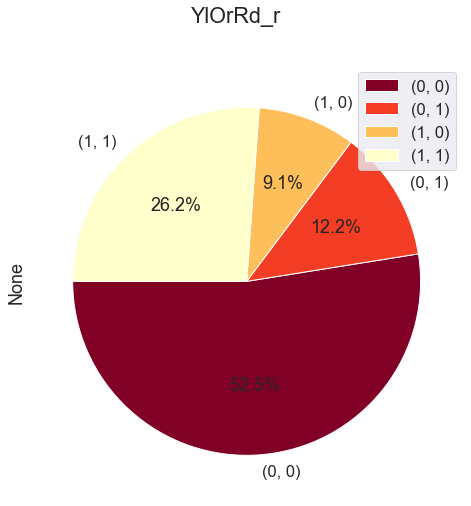

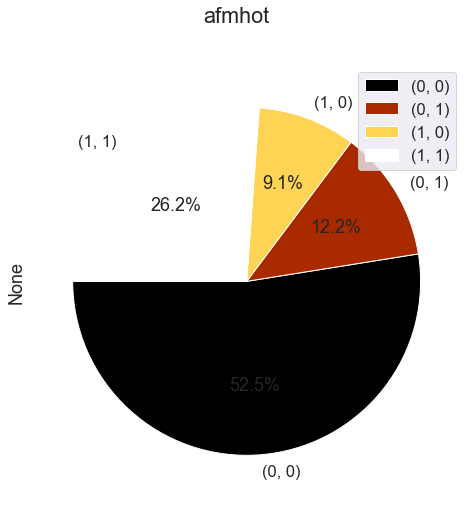

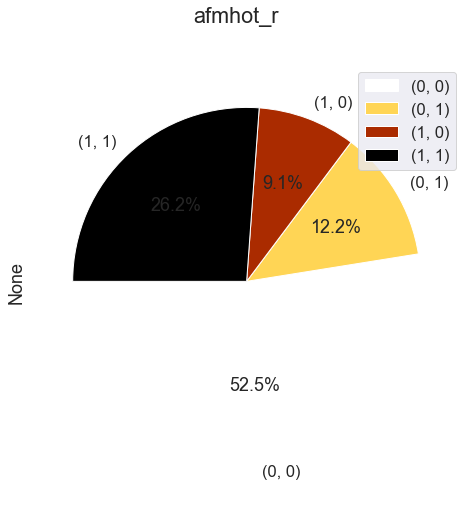

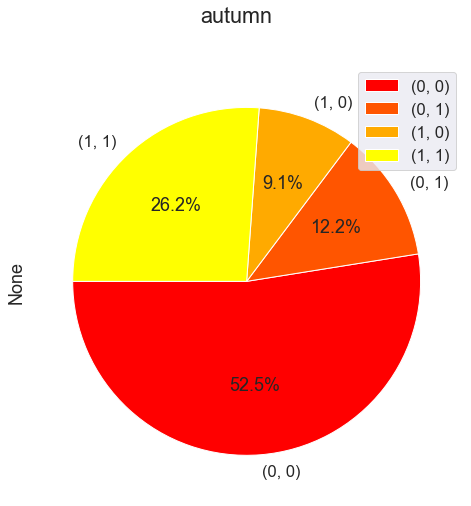

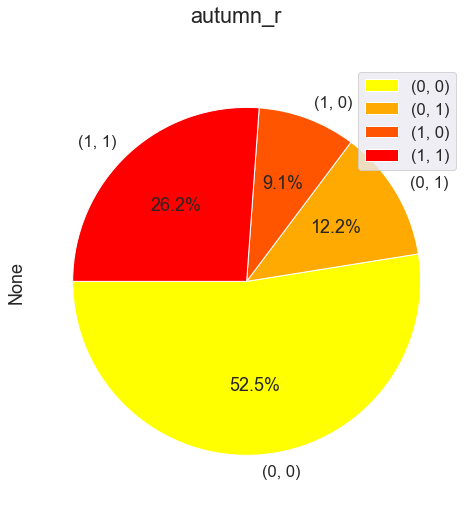

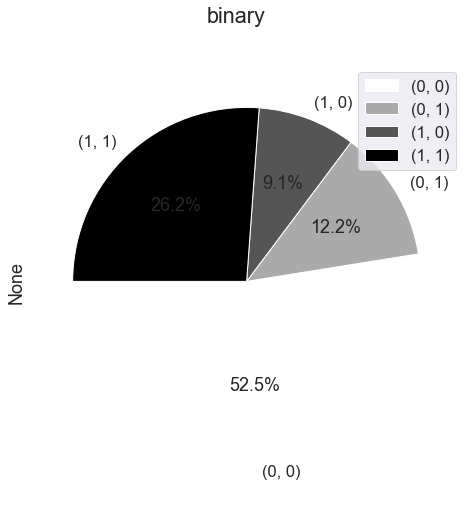

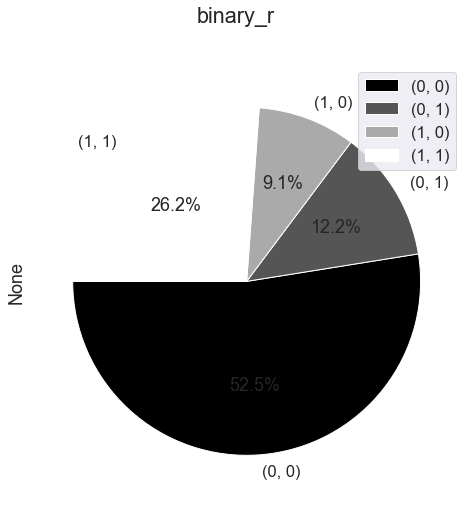

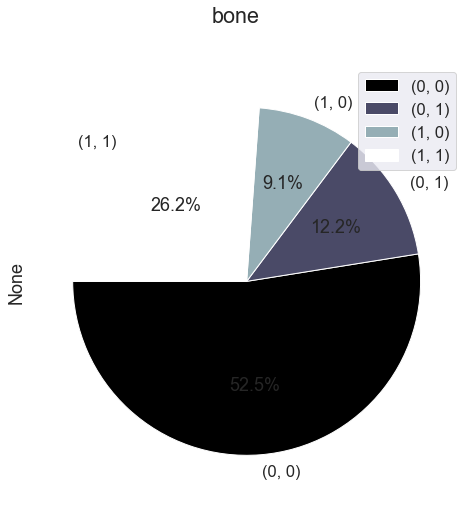

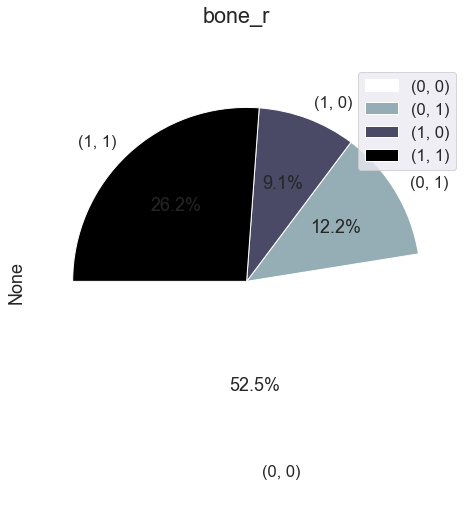

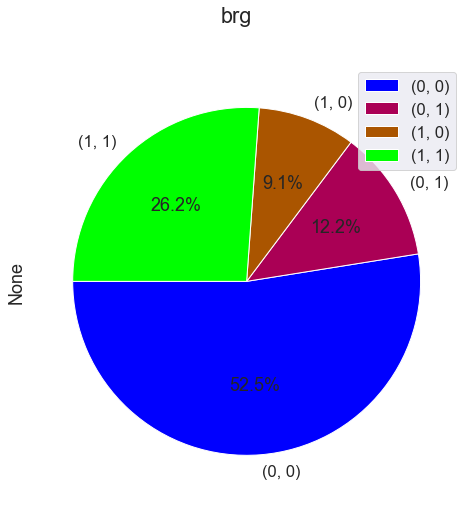

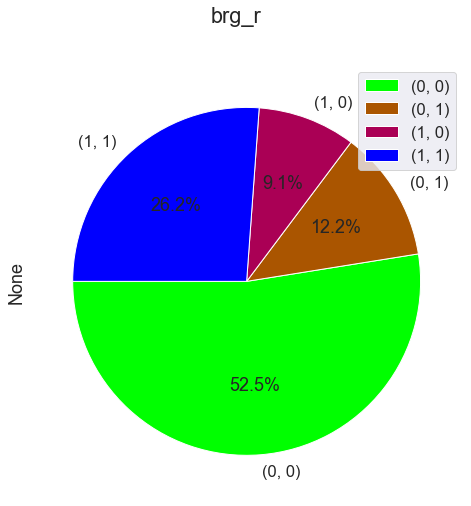

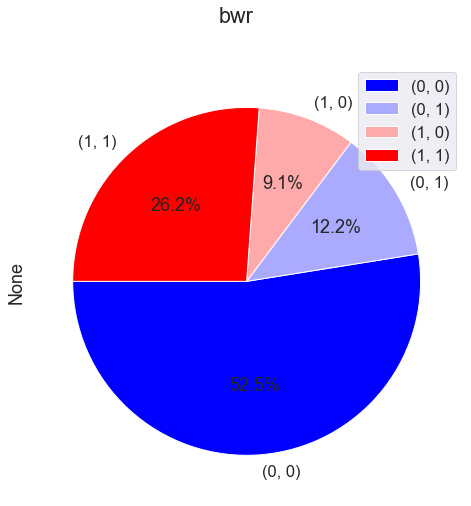

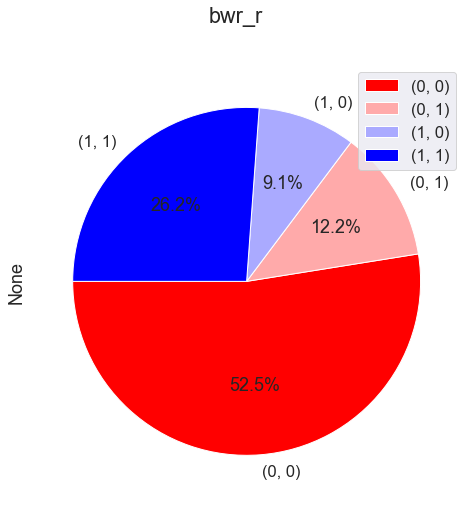

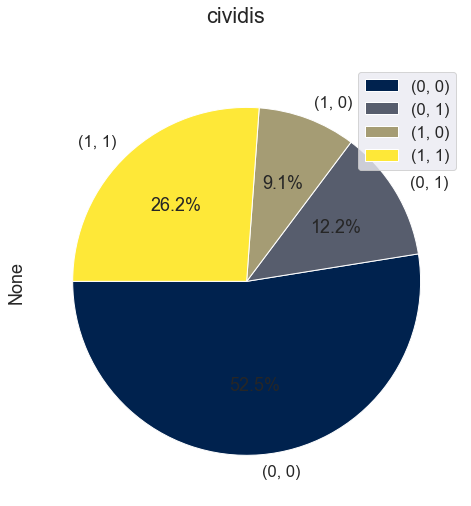

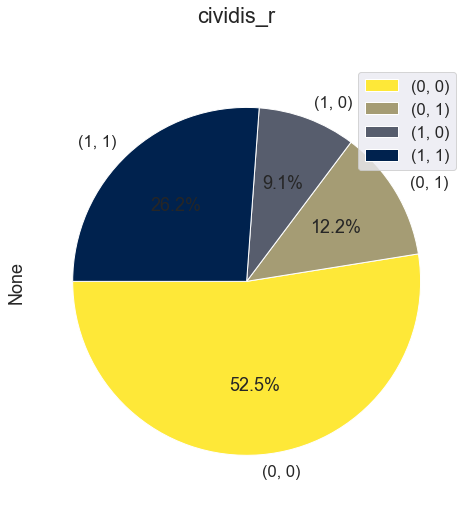

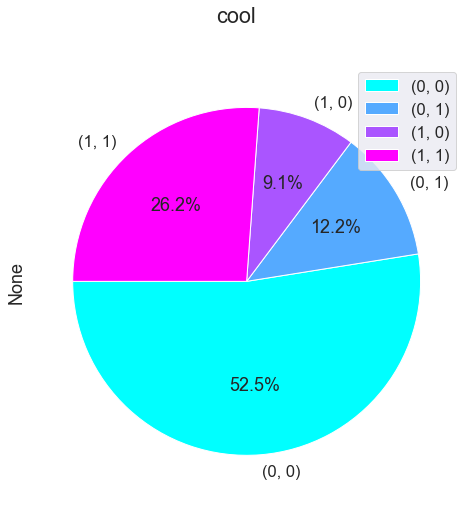

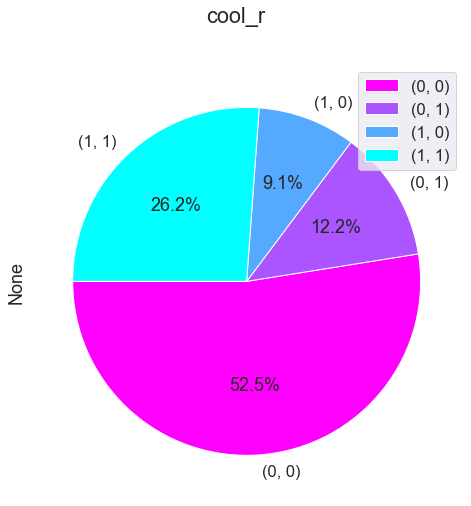

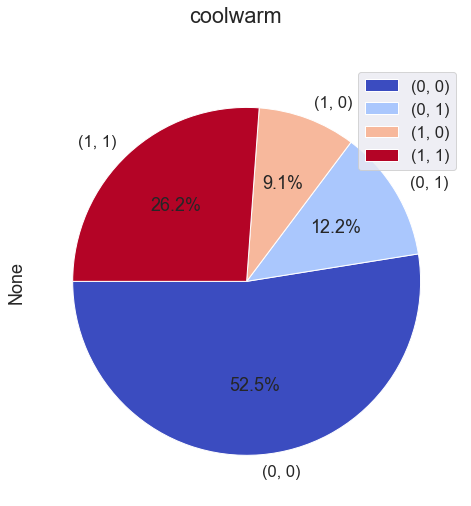

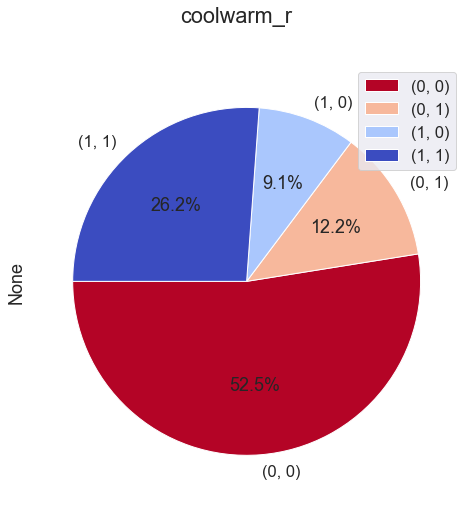

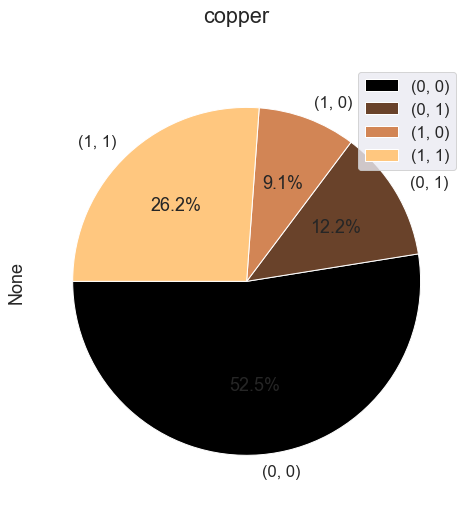

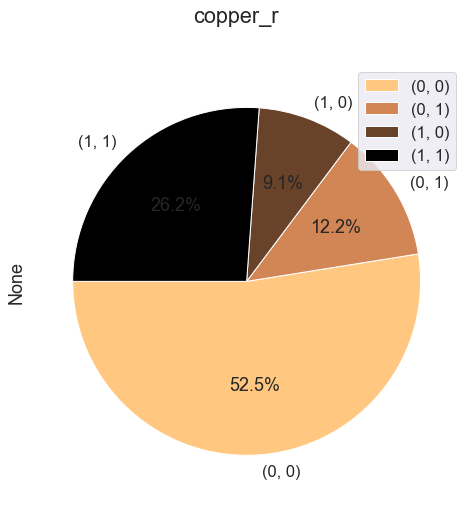

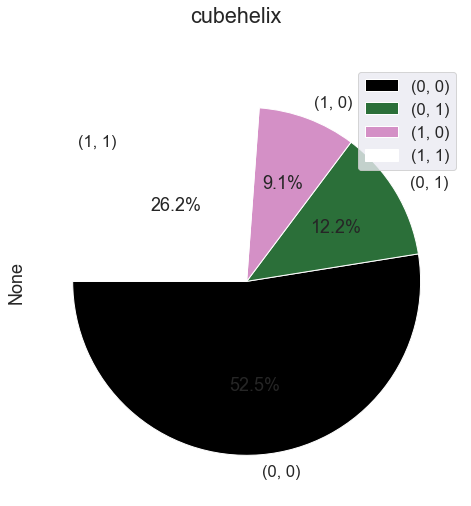

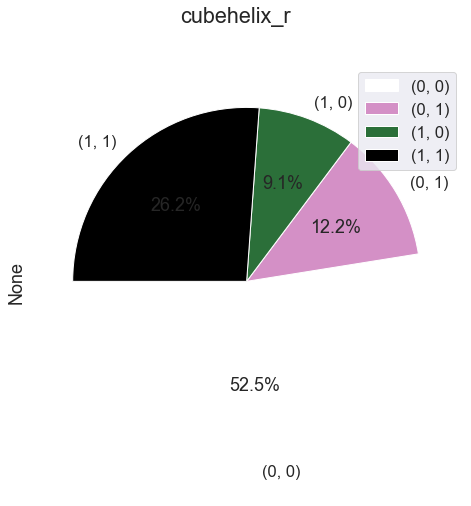

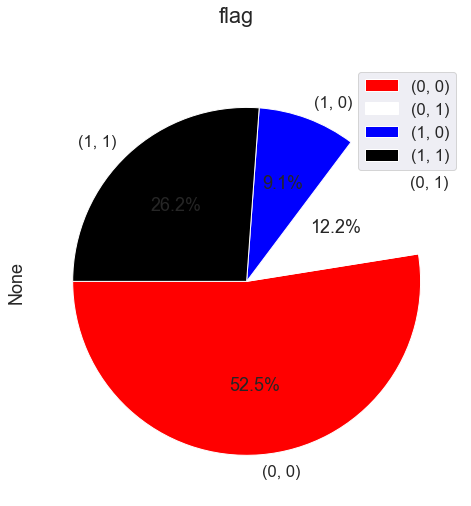

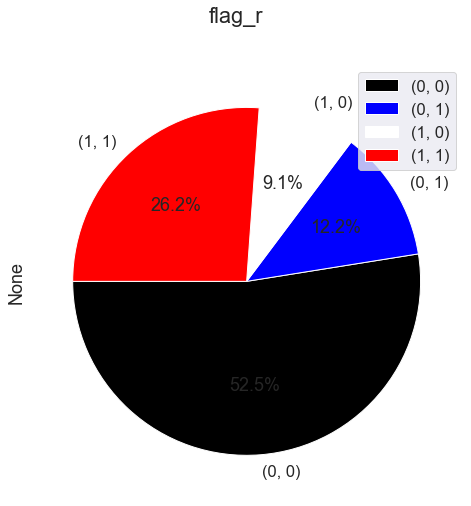

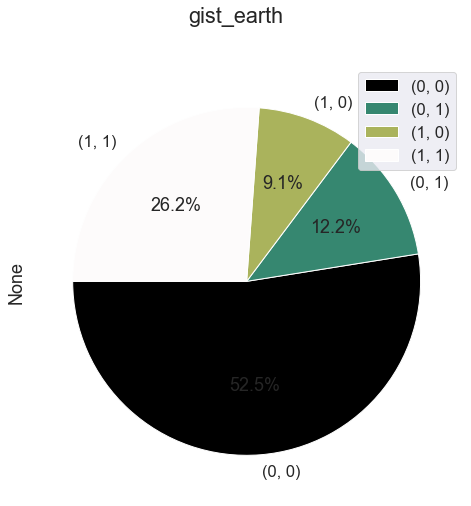

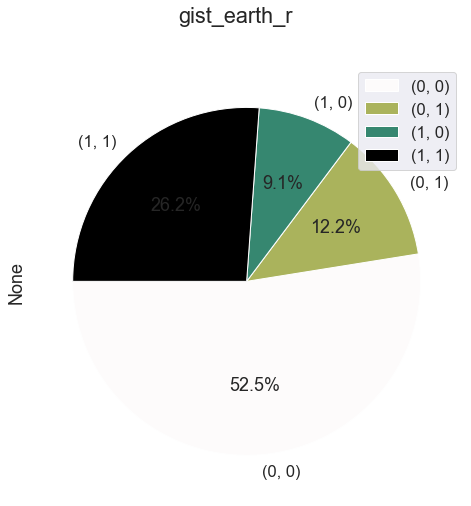

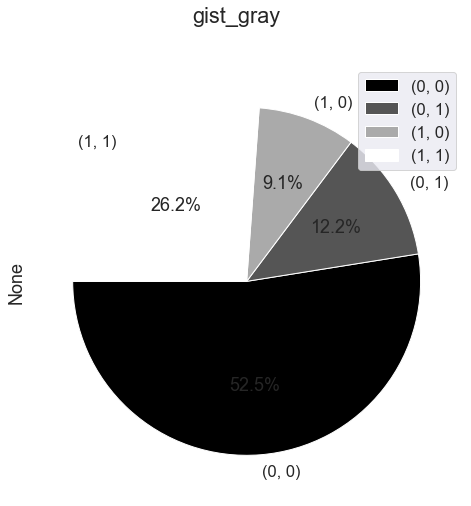

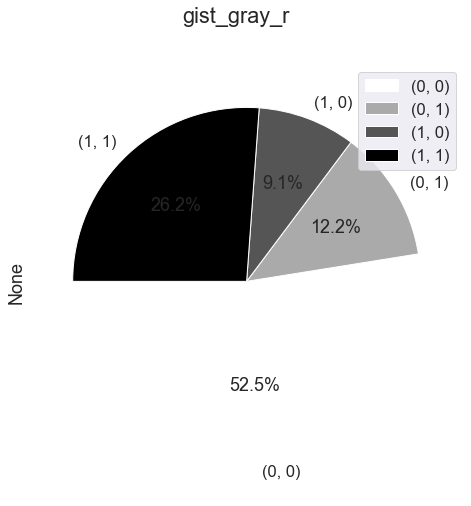

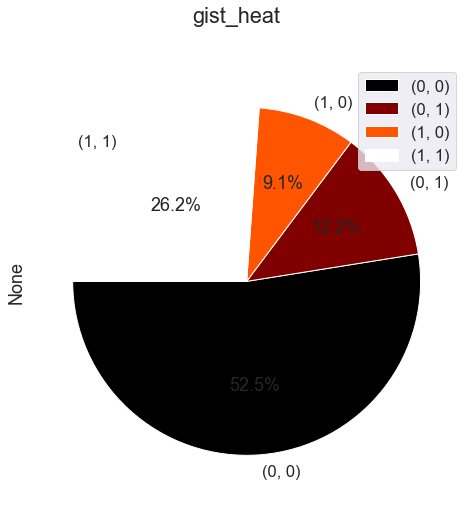

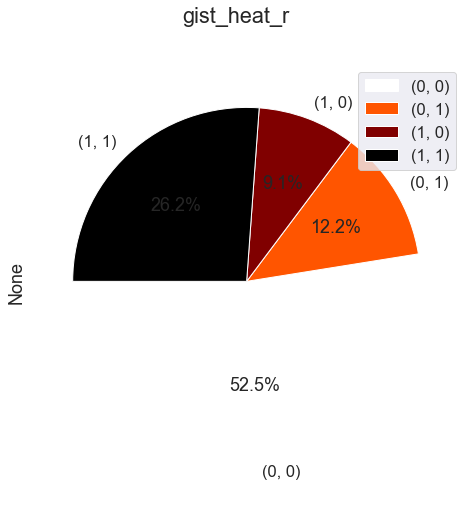

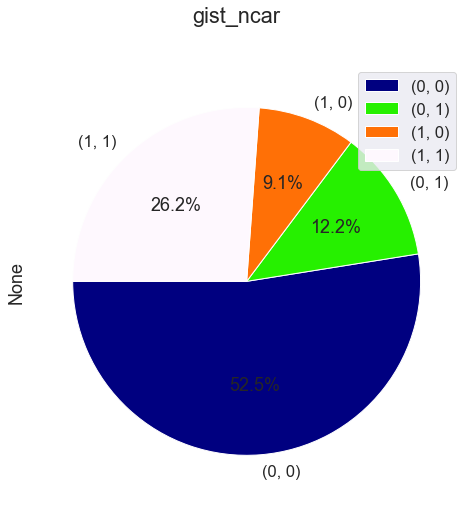

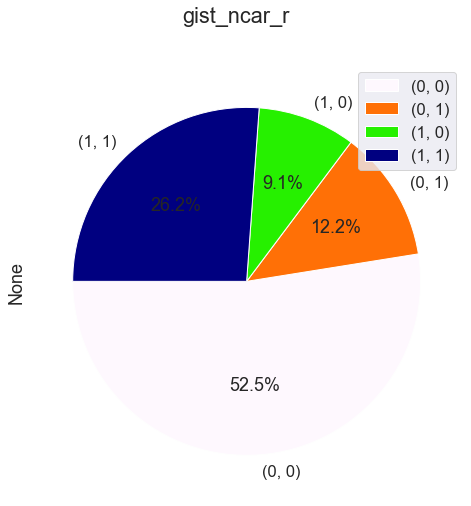

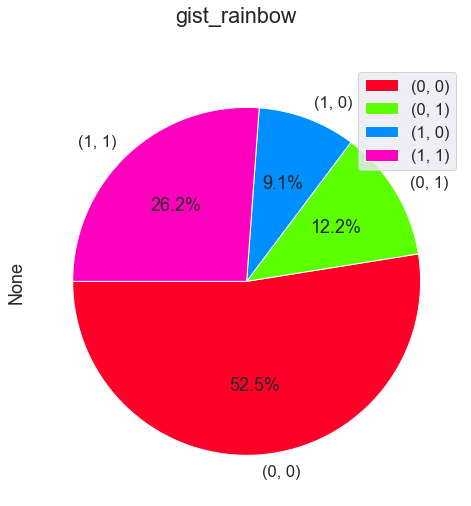

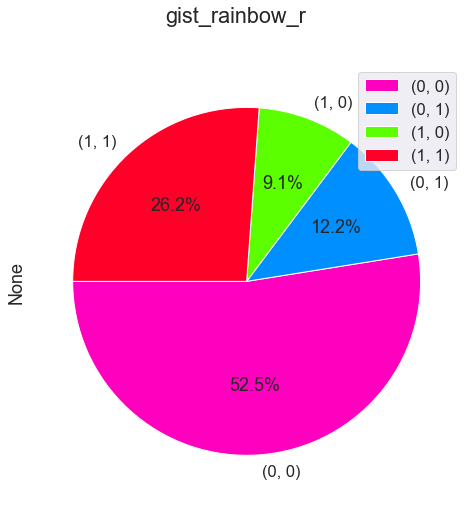

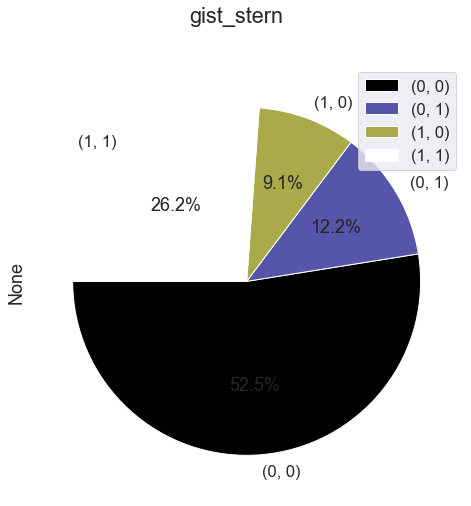

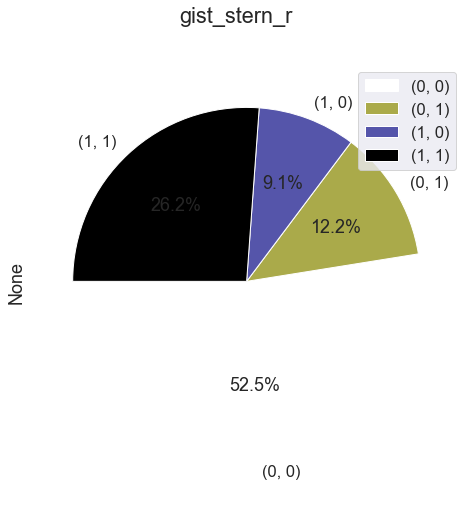

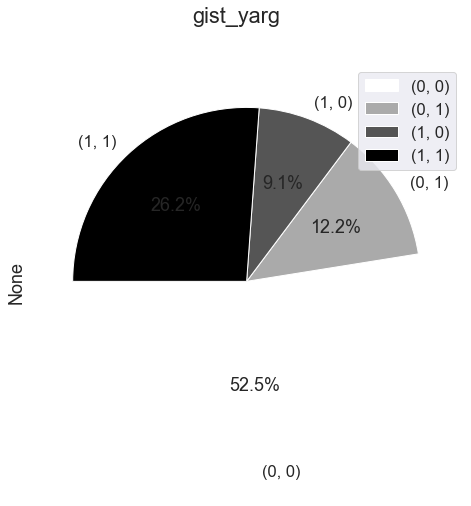

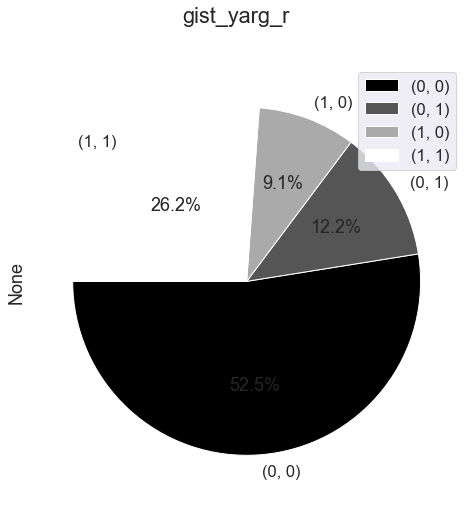

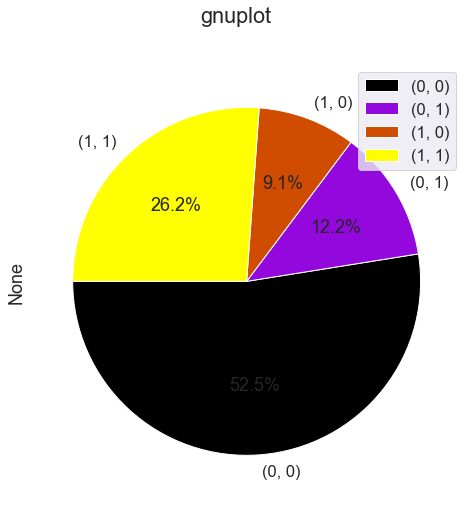

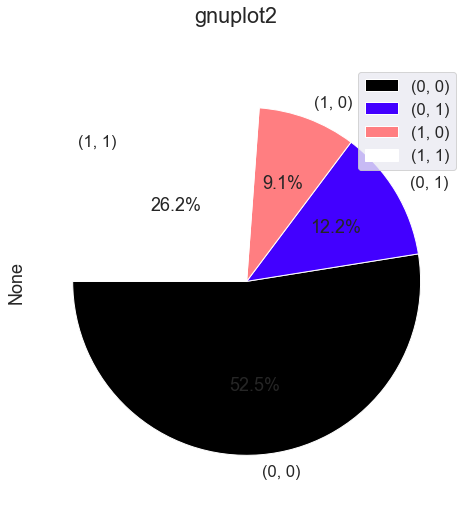

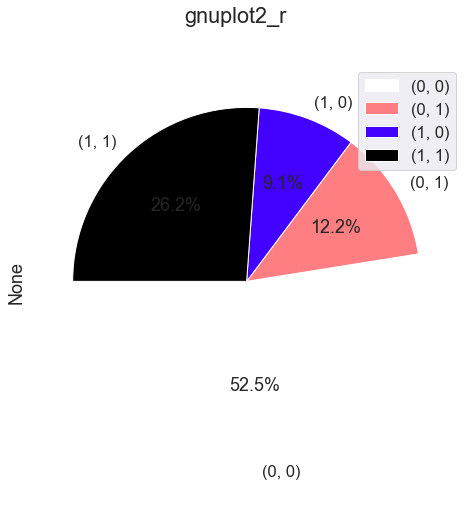

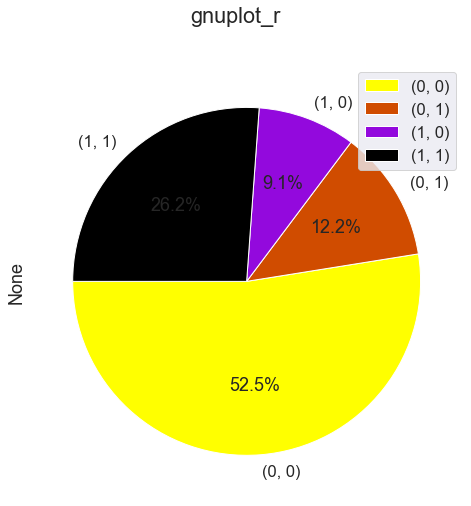

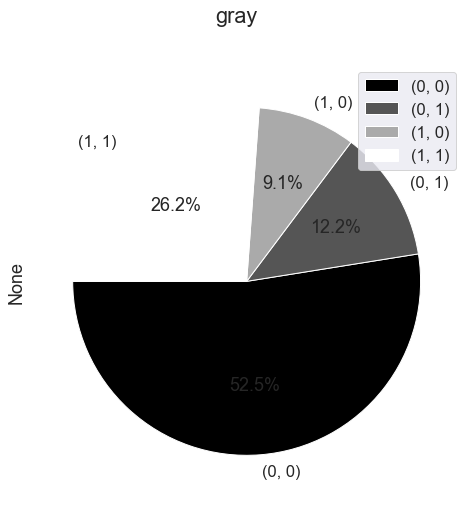

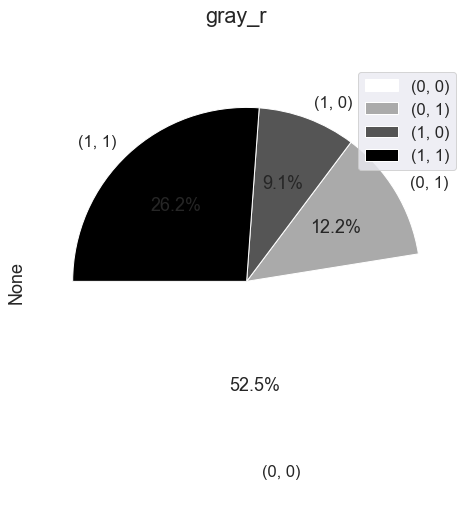

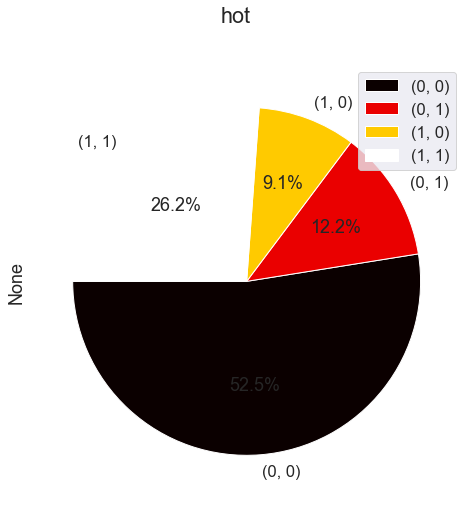

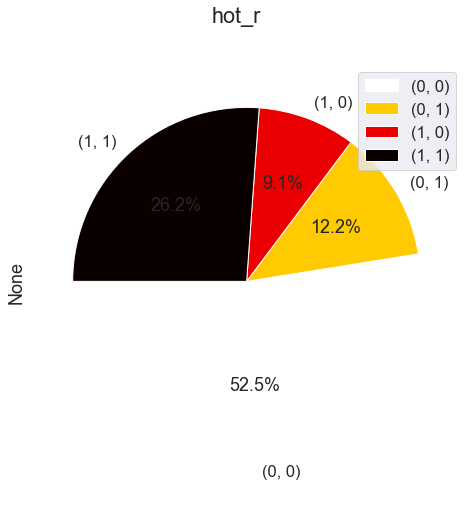

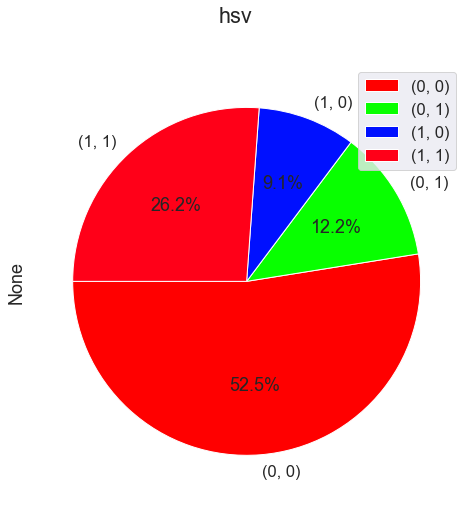

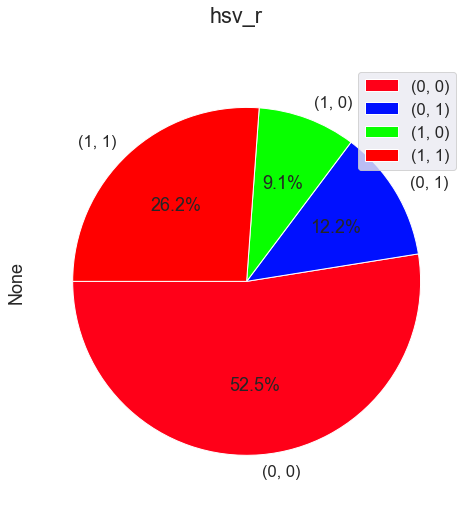

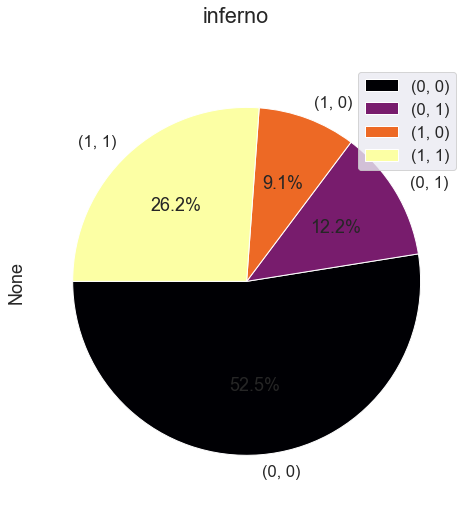

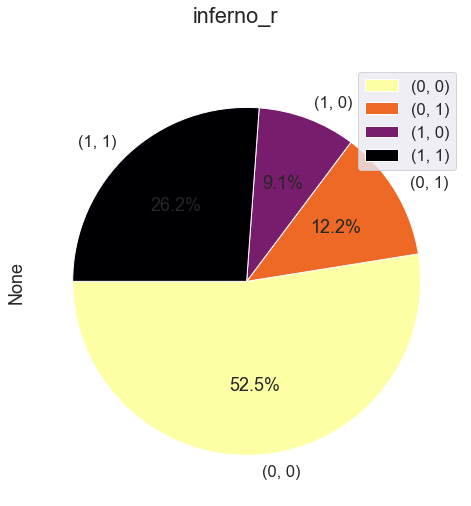

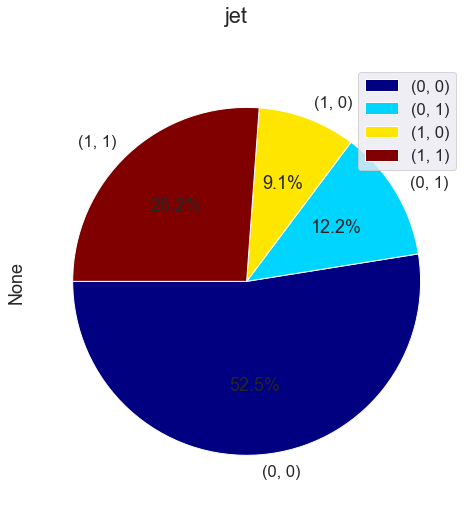

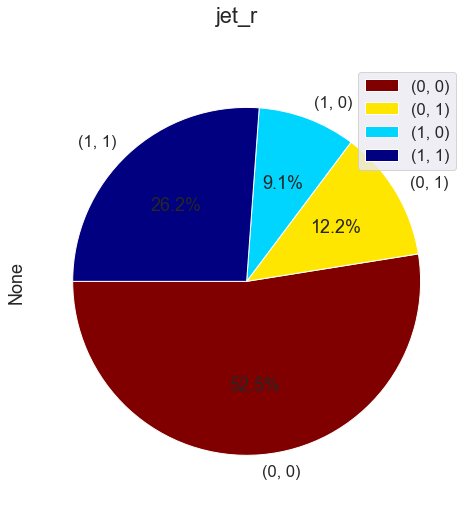

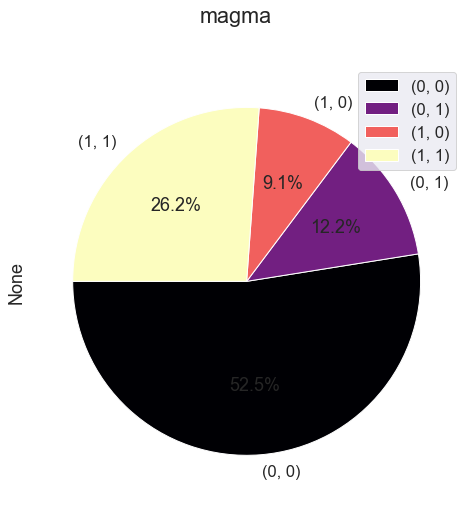

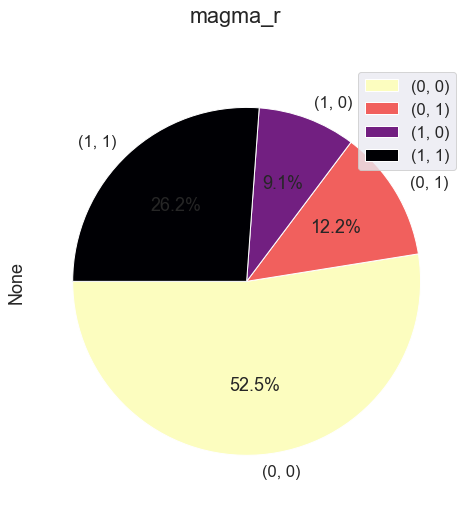

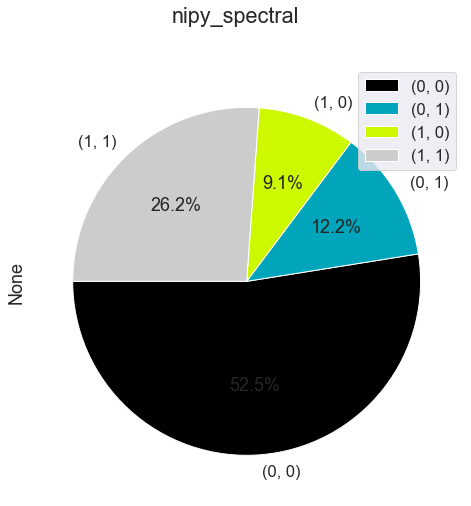

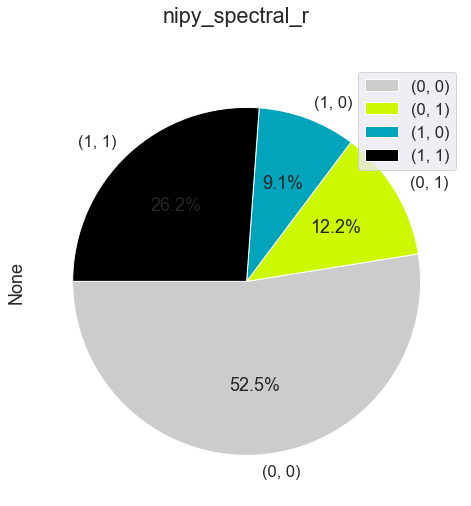

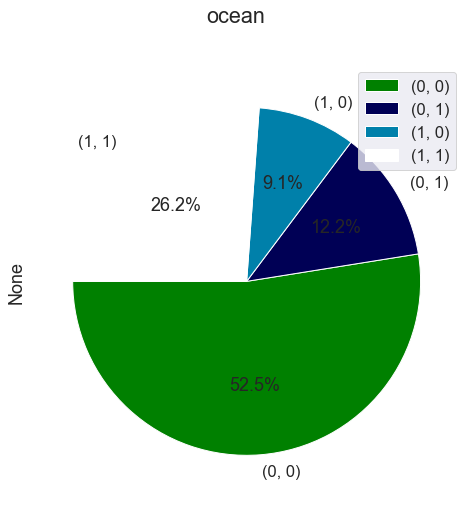

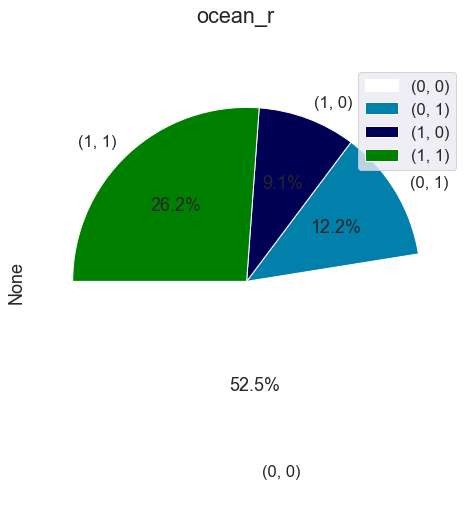

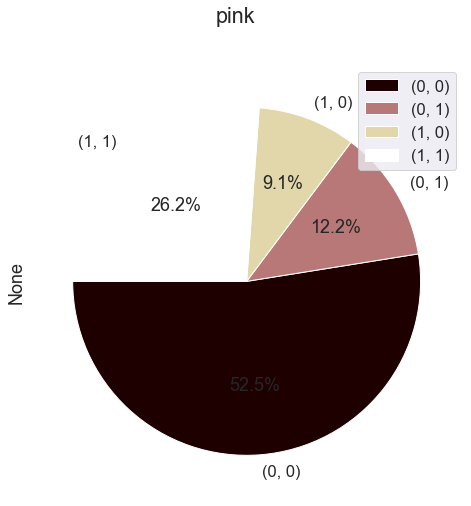

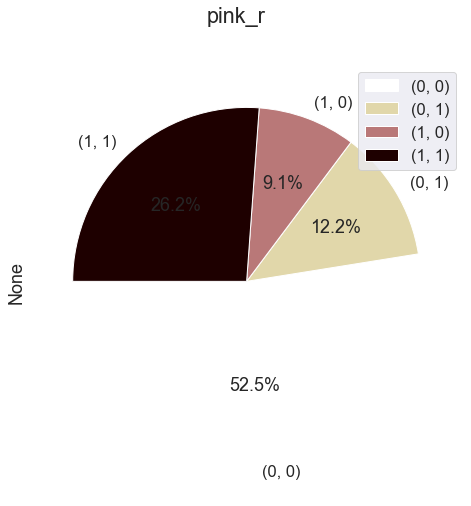

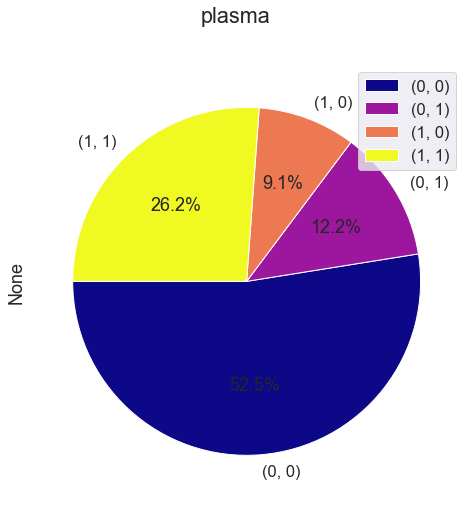

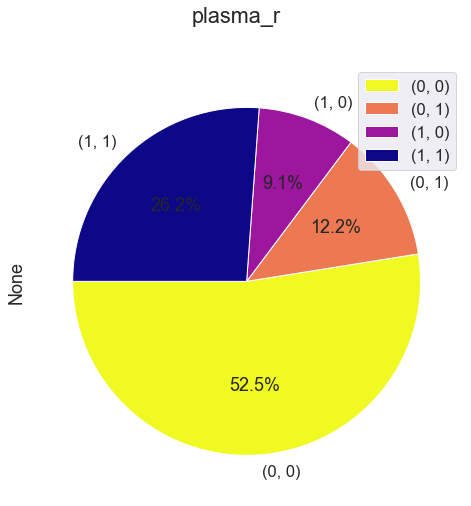

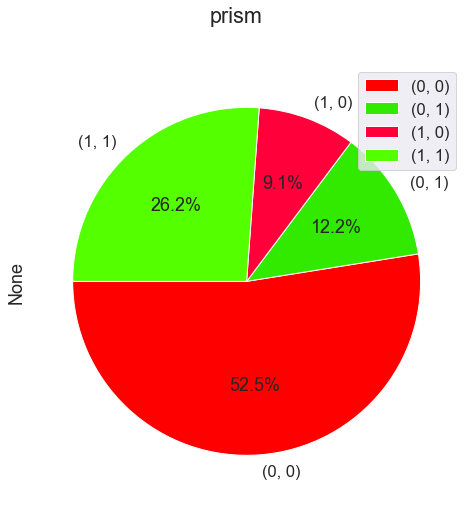

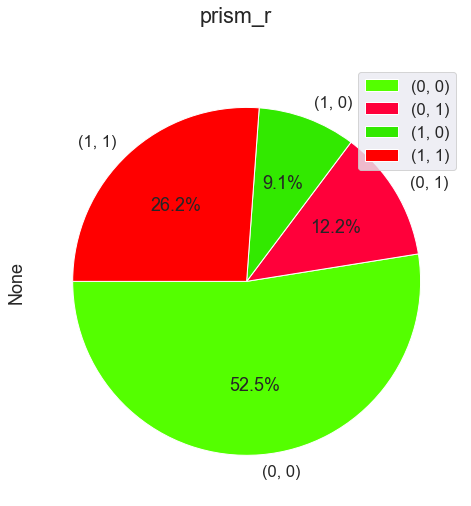

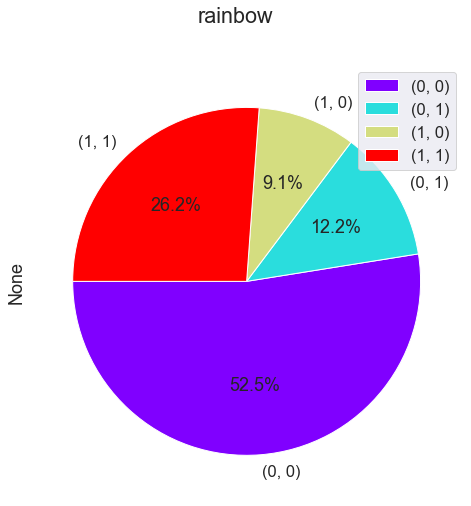

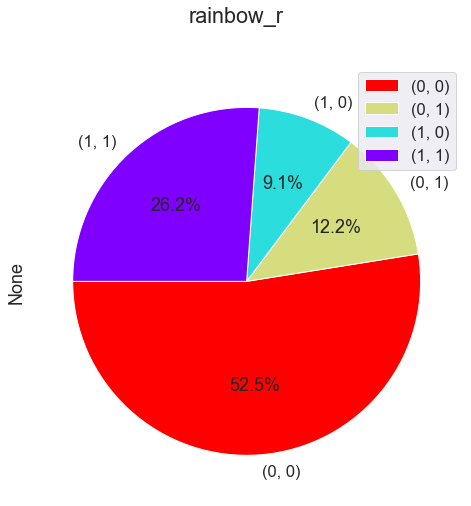

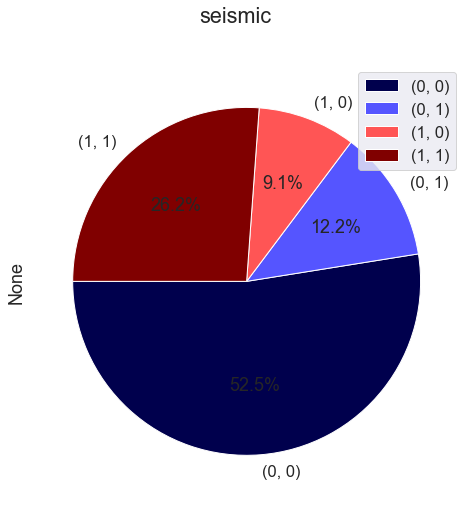

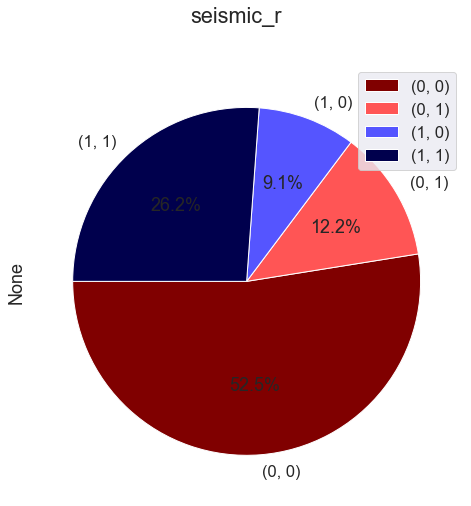

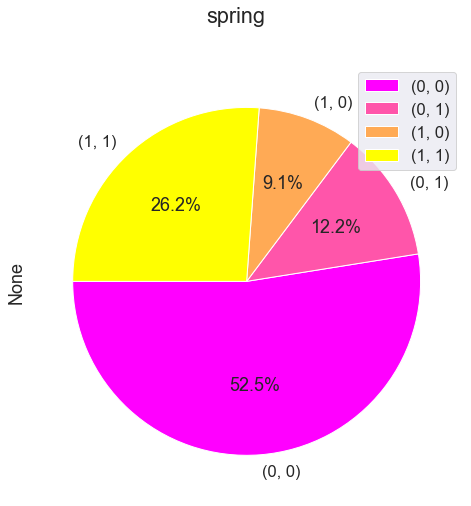

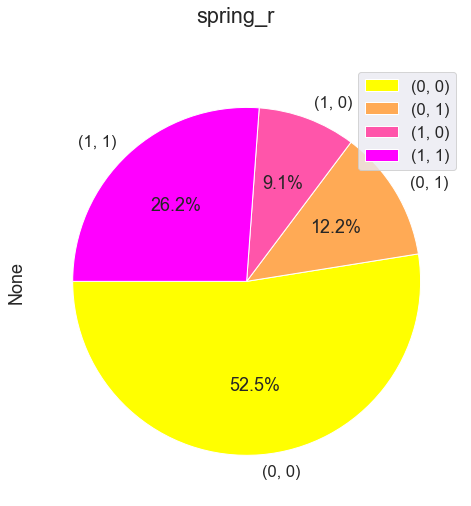

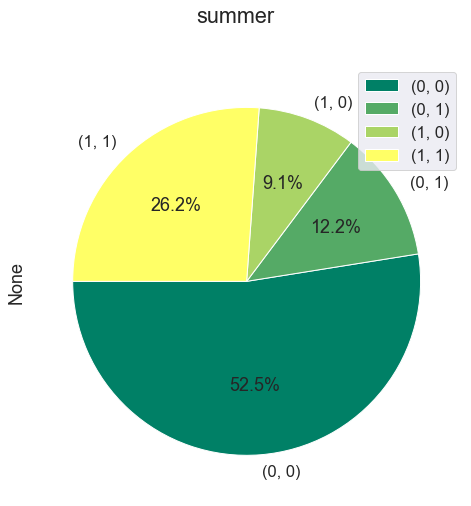

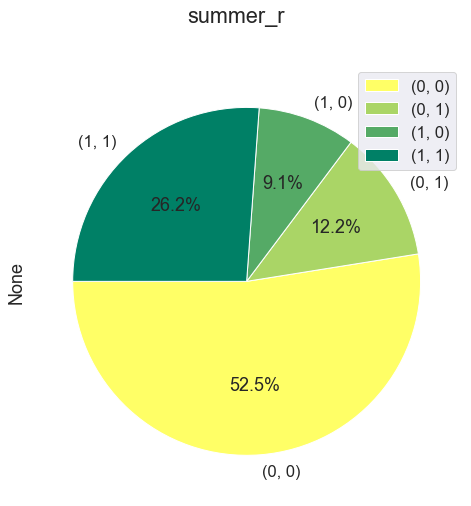

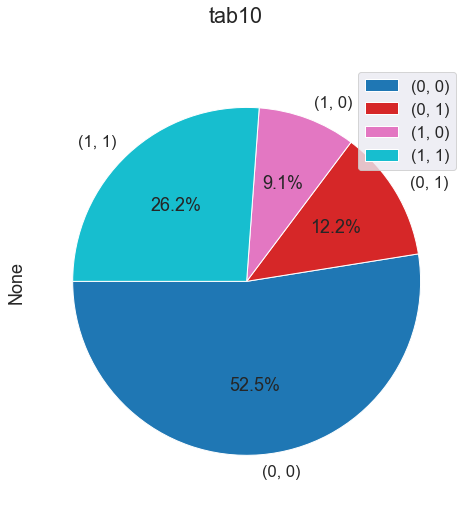

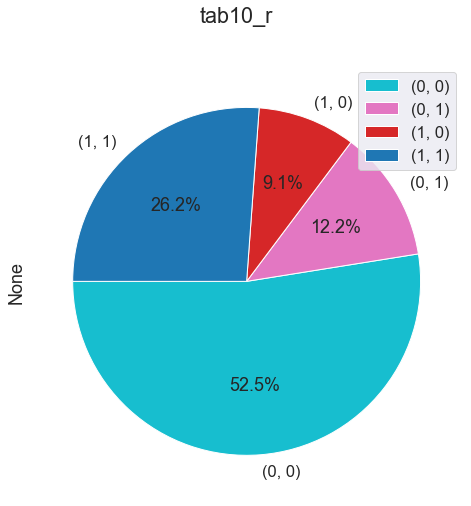

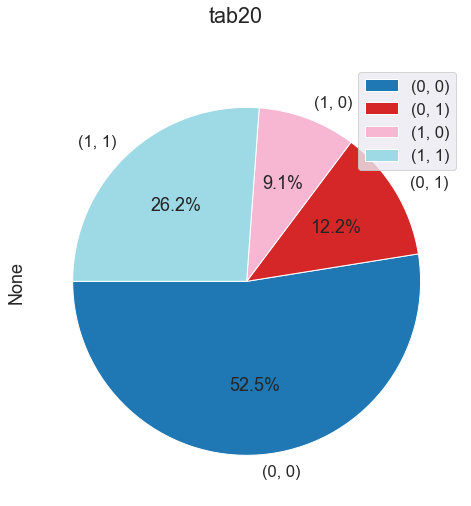

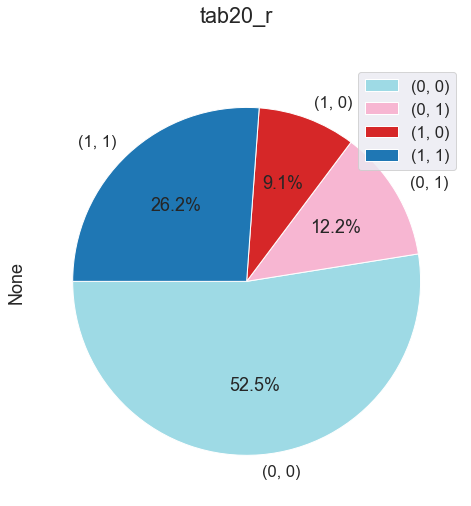

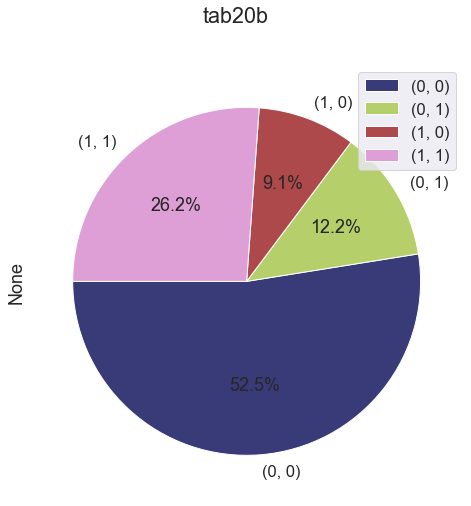

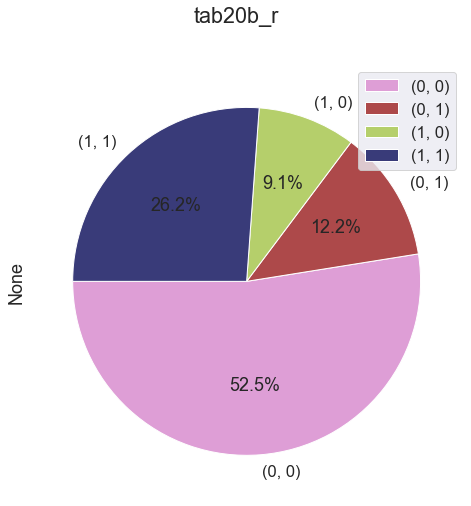

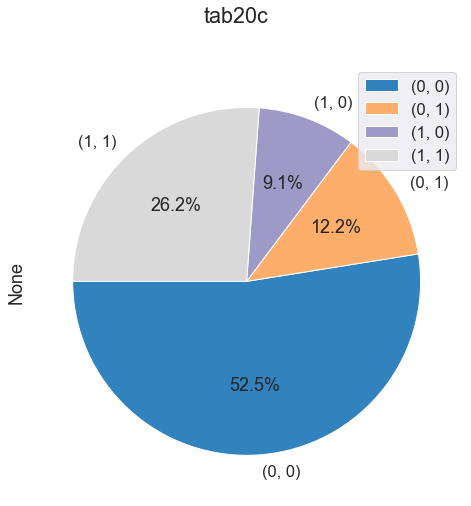

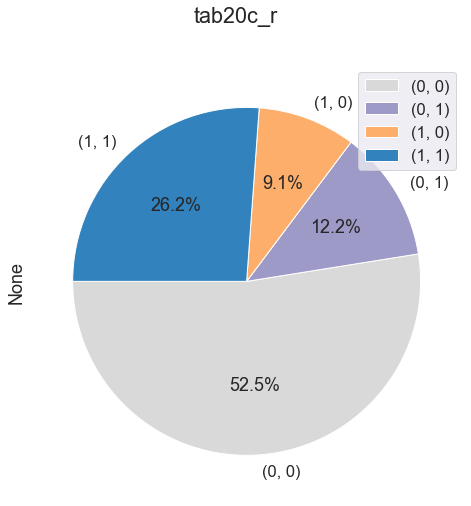

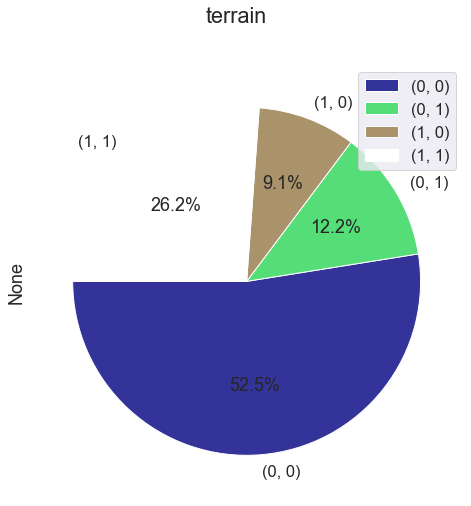

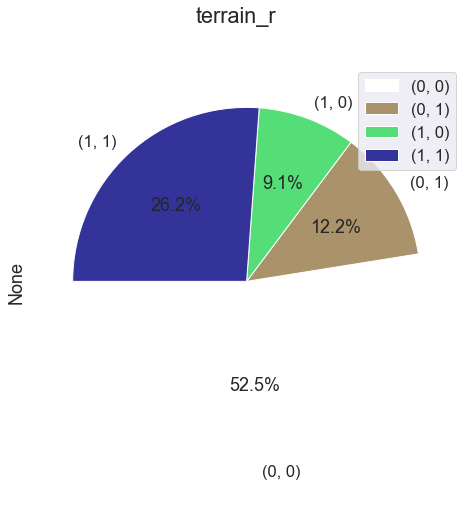

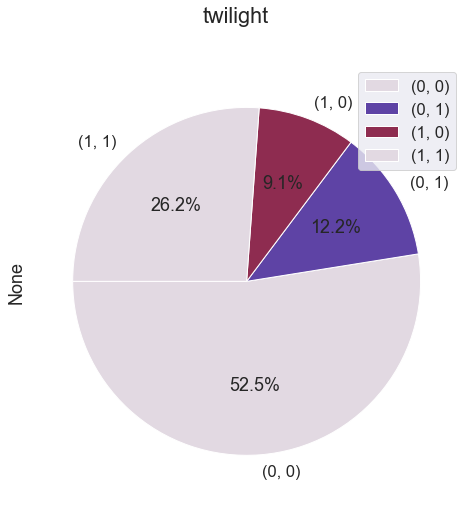

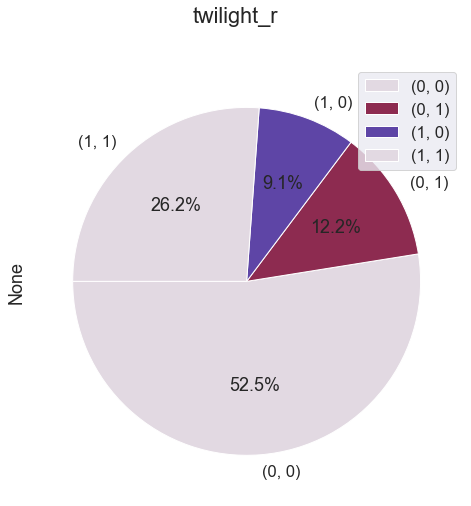

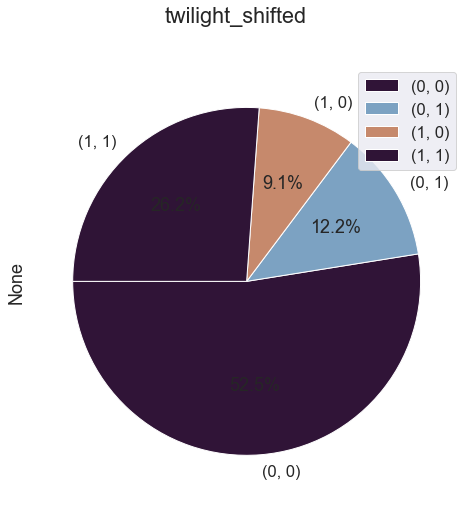

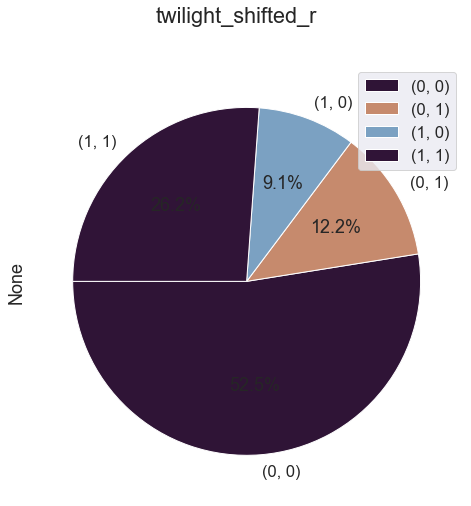

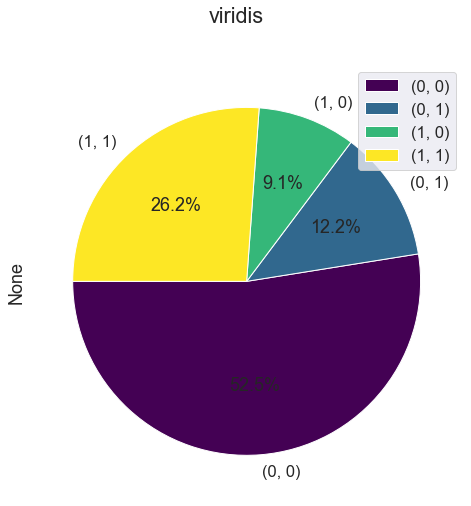

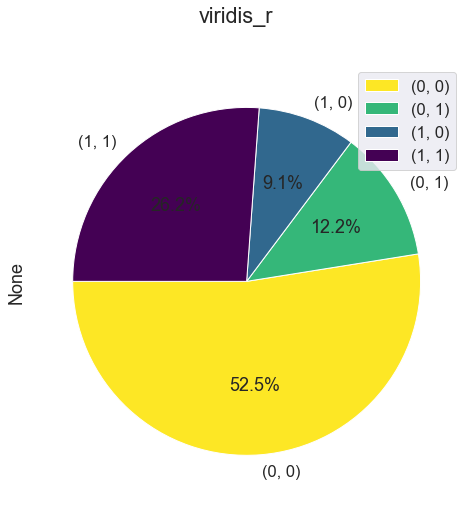

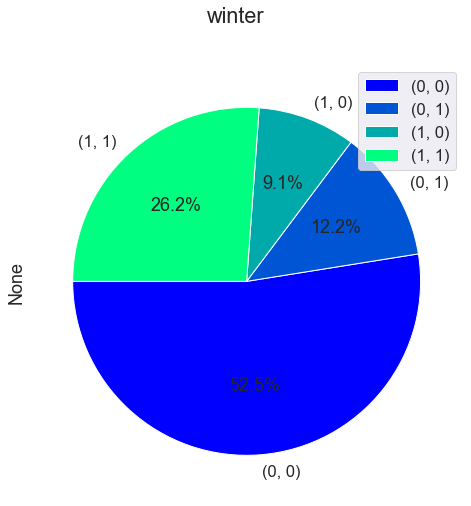

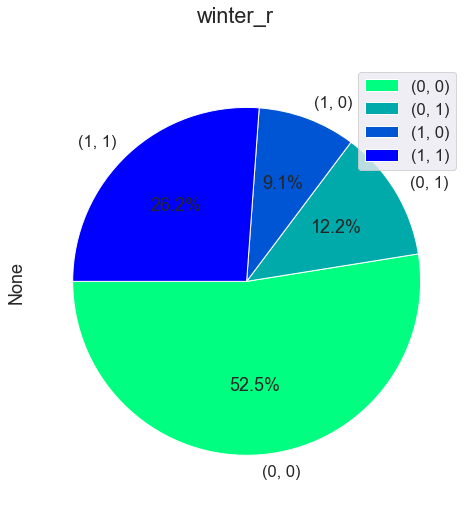

In [39]:
for col in dir(plt.cm):
    try:
#        df_train.groupby(['Sex', 'Pclass', 'Survived']).size().unstack().plot(kind='bar', cmap=col, title=col)
        df_train.groupby(['Sex', 'Survived']).size().plot(figsize=(12,8),kind='pie', legend=True, autopct='%1.1f%%',startangle=180, subplots=True, cmap=col, title=col)
        plt.show()
    except: 
        pass

In [119]:
data = pd.cut(df_train['Age'], bins=[0, 12, 20, 30, 40, 50, 100], labels=range(6))

In [120]:
data = data.dropna().astype(int)

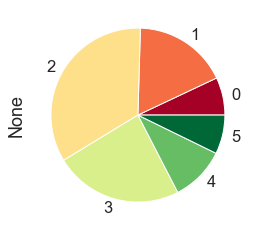

In [123]:
data.reset_index().groupby('Age').size().plot(kind='pie', cmap='RdYlGn')

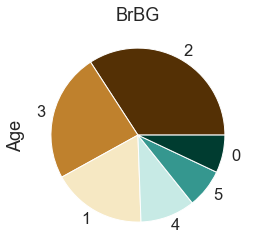

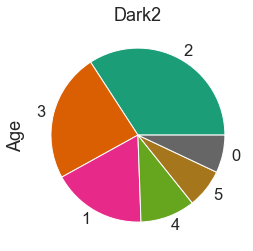

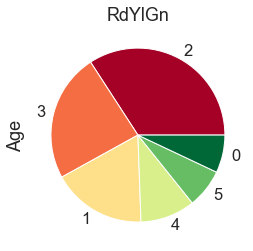

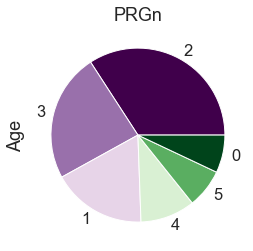

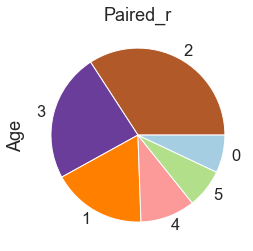

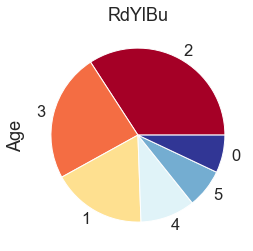

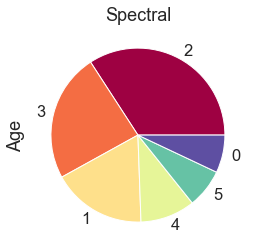

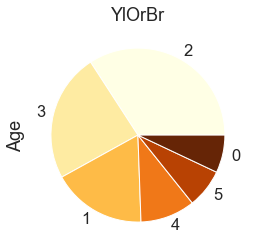

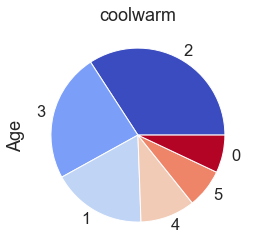

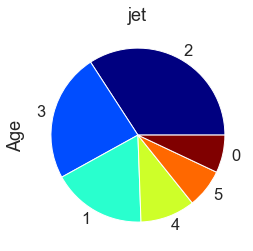

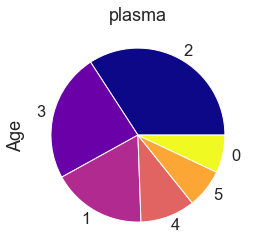

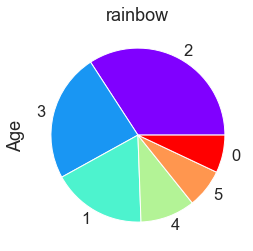

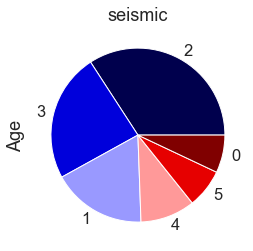

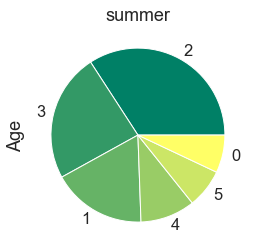

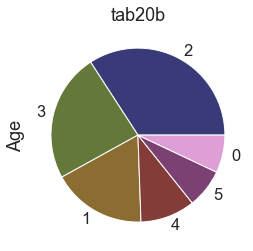

In [158]:
for col in ['BrBG', 'Dark2', 'RdYlGn', 'PRGn', 'Paired_r', 'RdYlBu', 'Spectral', 'YlOrBr', 'coolwarm', 'jet', 'plasma', 'rainbow', 'seismic', 'summer', 'tab20b']:
    data.value_counts().plot(kind='pie', colormap=col, legend=False, title=col)
    plt.show()

In [168]:
pd.cut(df_train['Age'].fillna(df_train.Age.median(), inplace=True), bins=range(5), labels=range(4))

ValueError: Input array must be 1 dimensional